In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
%matplotlib inline

from keras_transfer_learning.utils import visualize
visualize.set_default_plotting()

Using TensorFlow backend.
/home/benjamin/miniconda3/envs/bachelorthesis/lib/python3.6/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


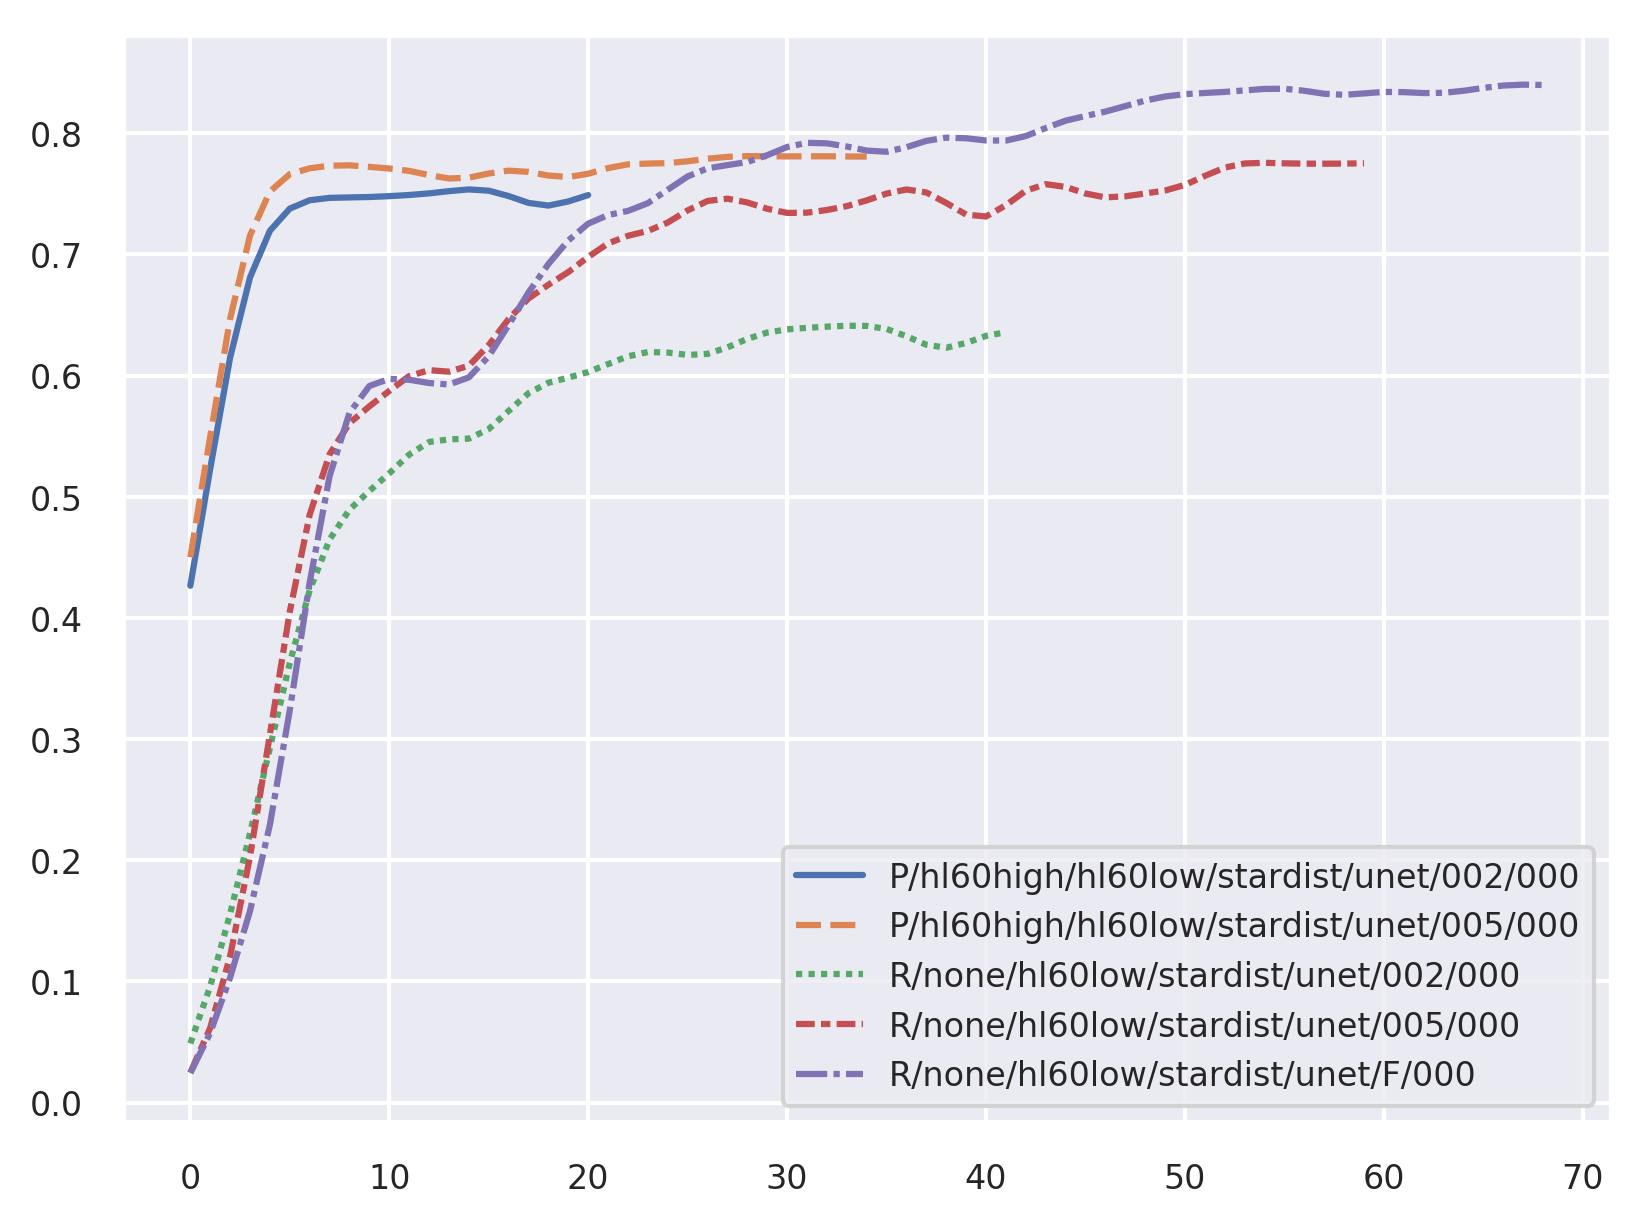

In [2]:
fig = visualize.plot_over_epoch('(R/none|P/hl60high)/hl60low/stardist/unet/(002|005|F)/000', 'ap_dsb2018#mean')
fig.savefig('/tmp/plot_over_epoch_hl60.png', bbox_inches='tight')

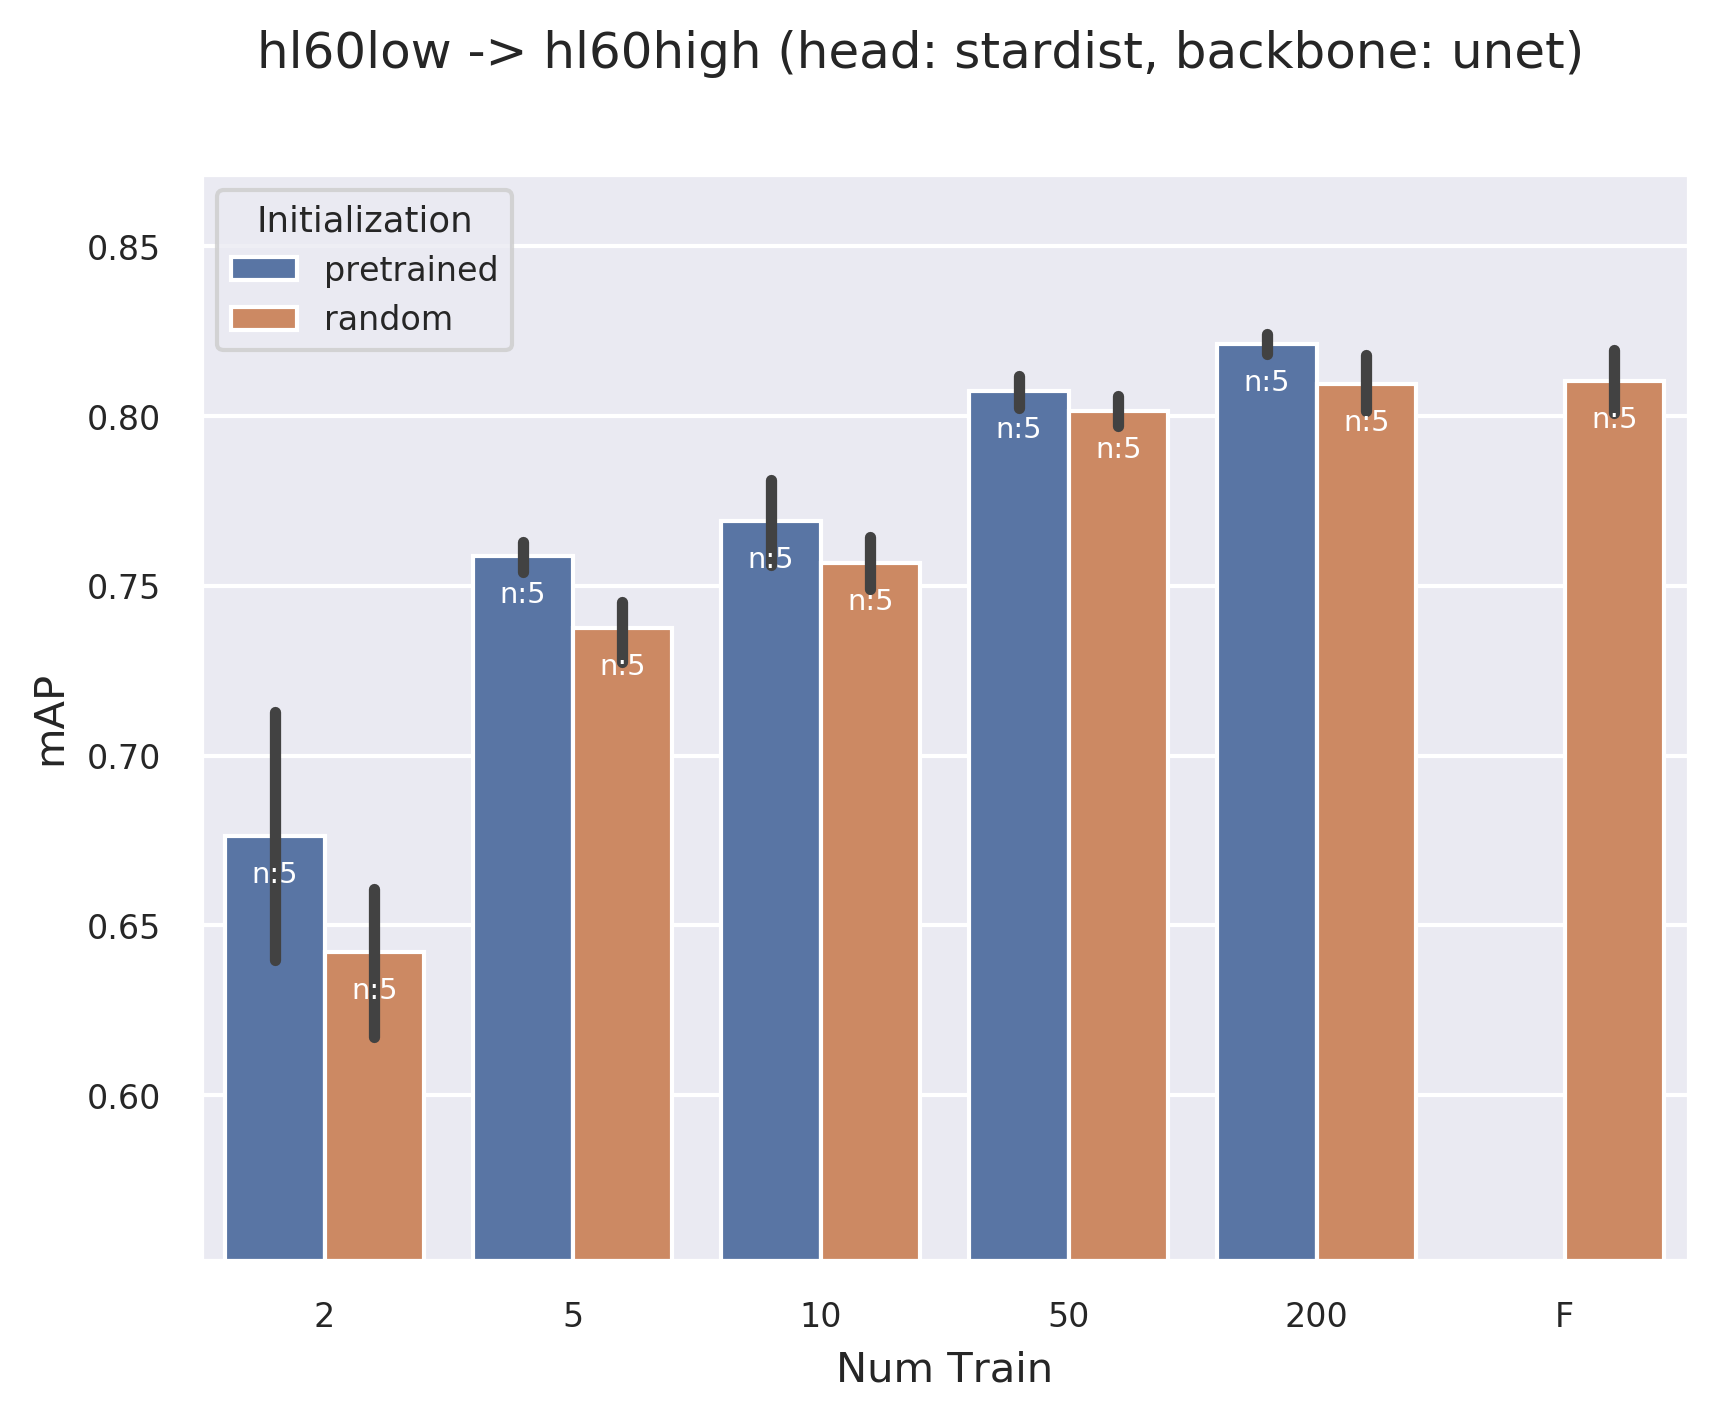

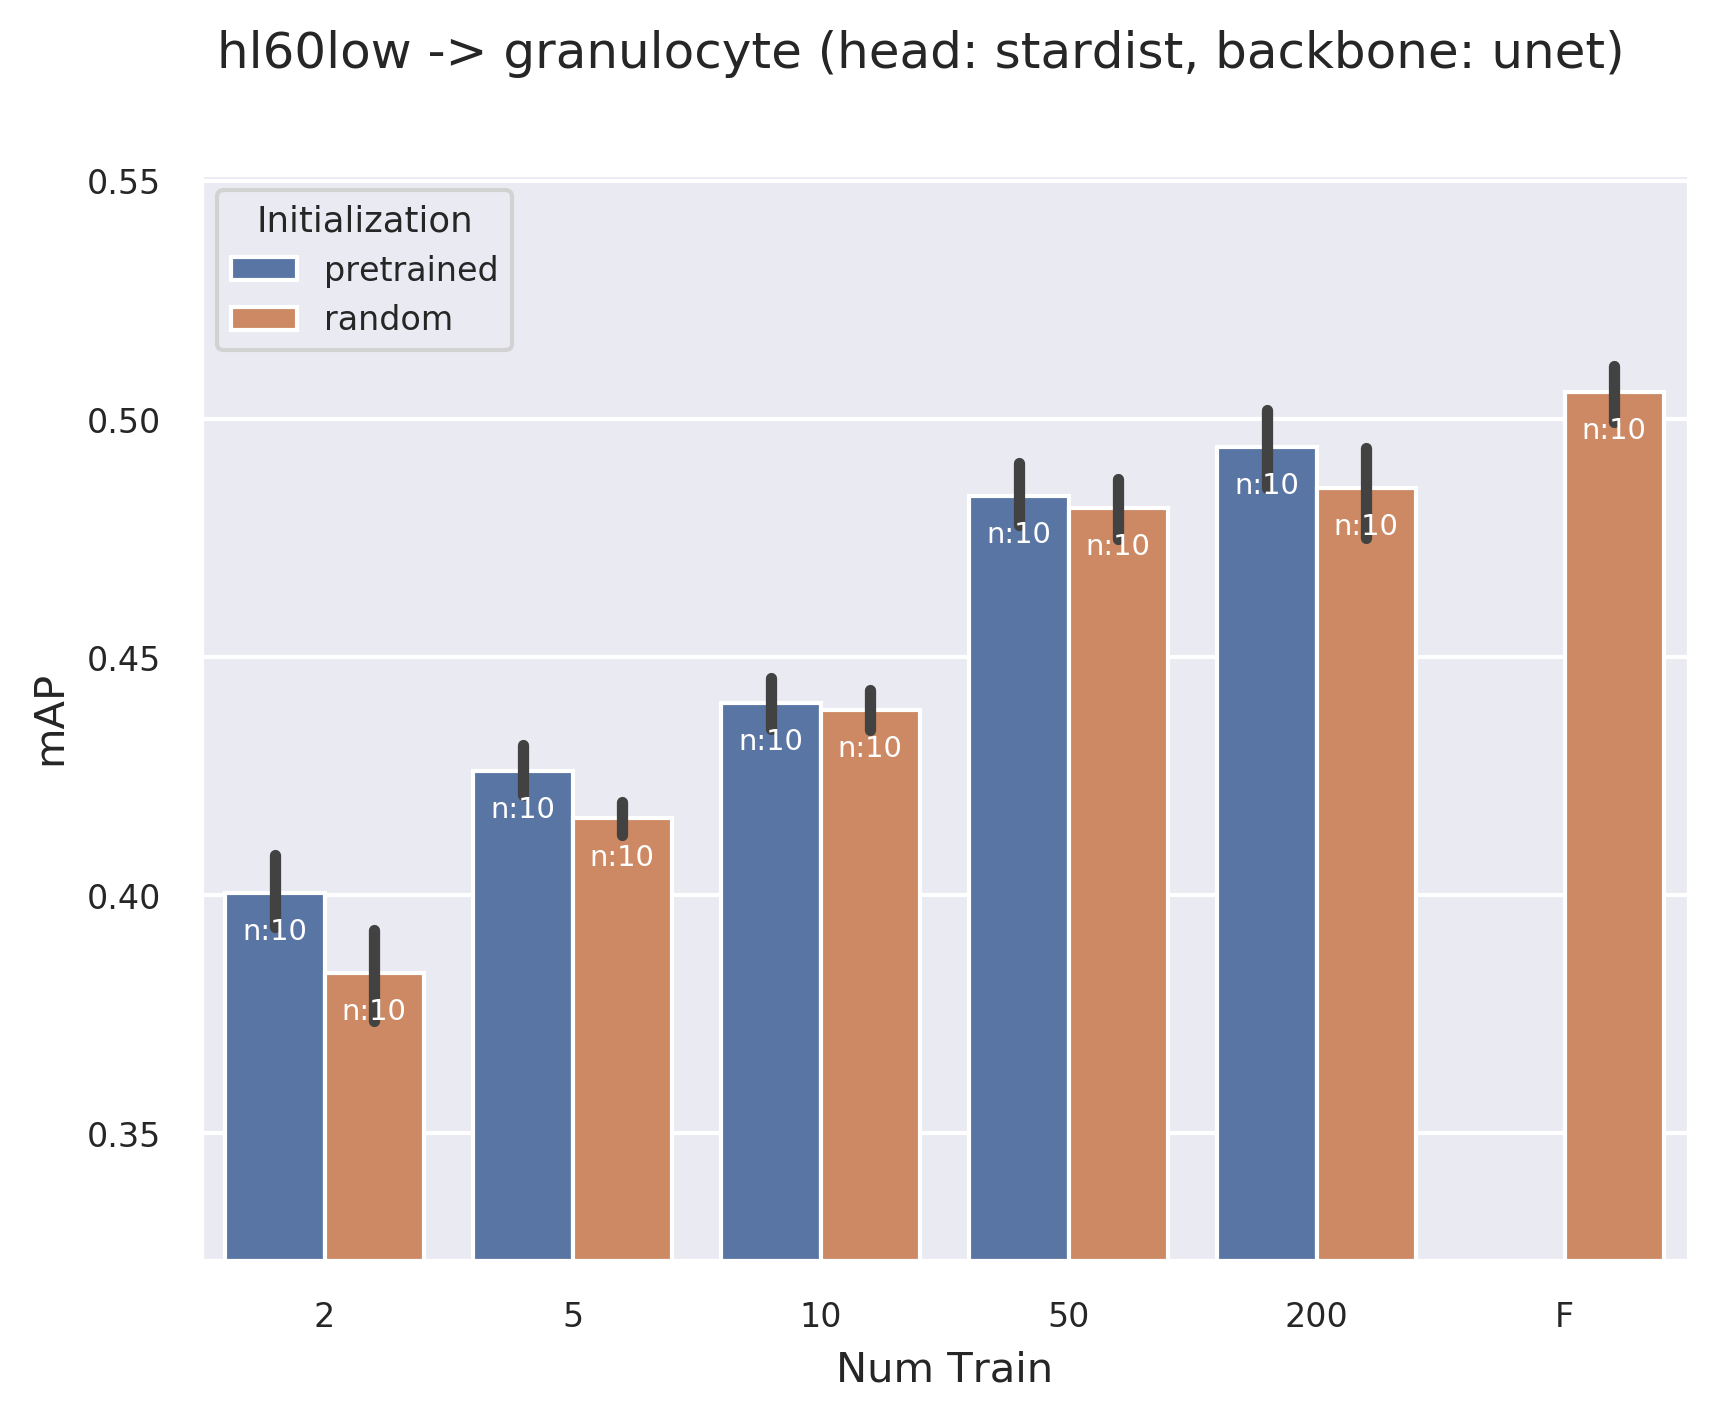

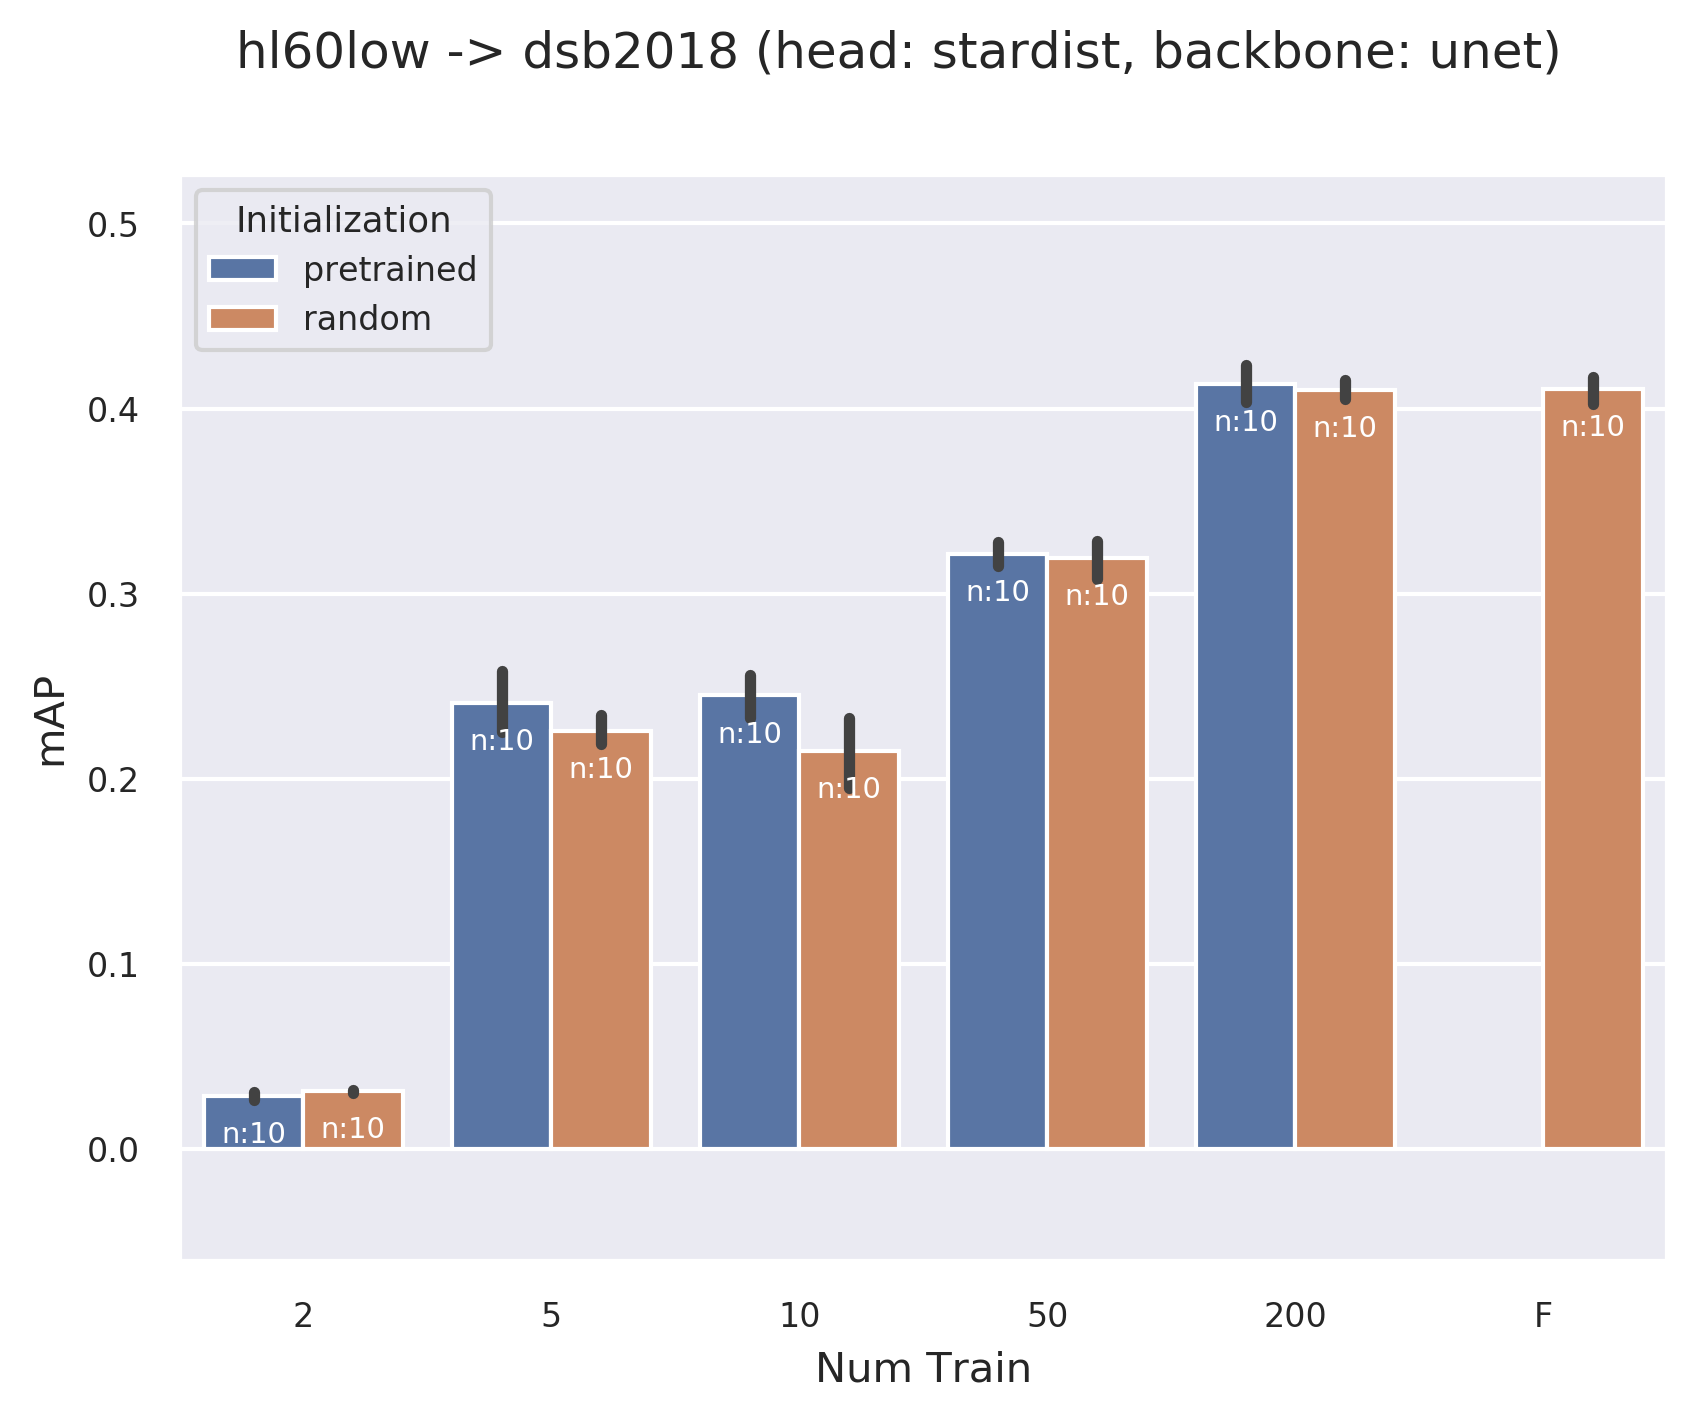

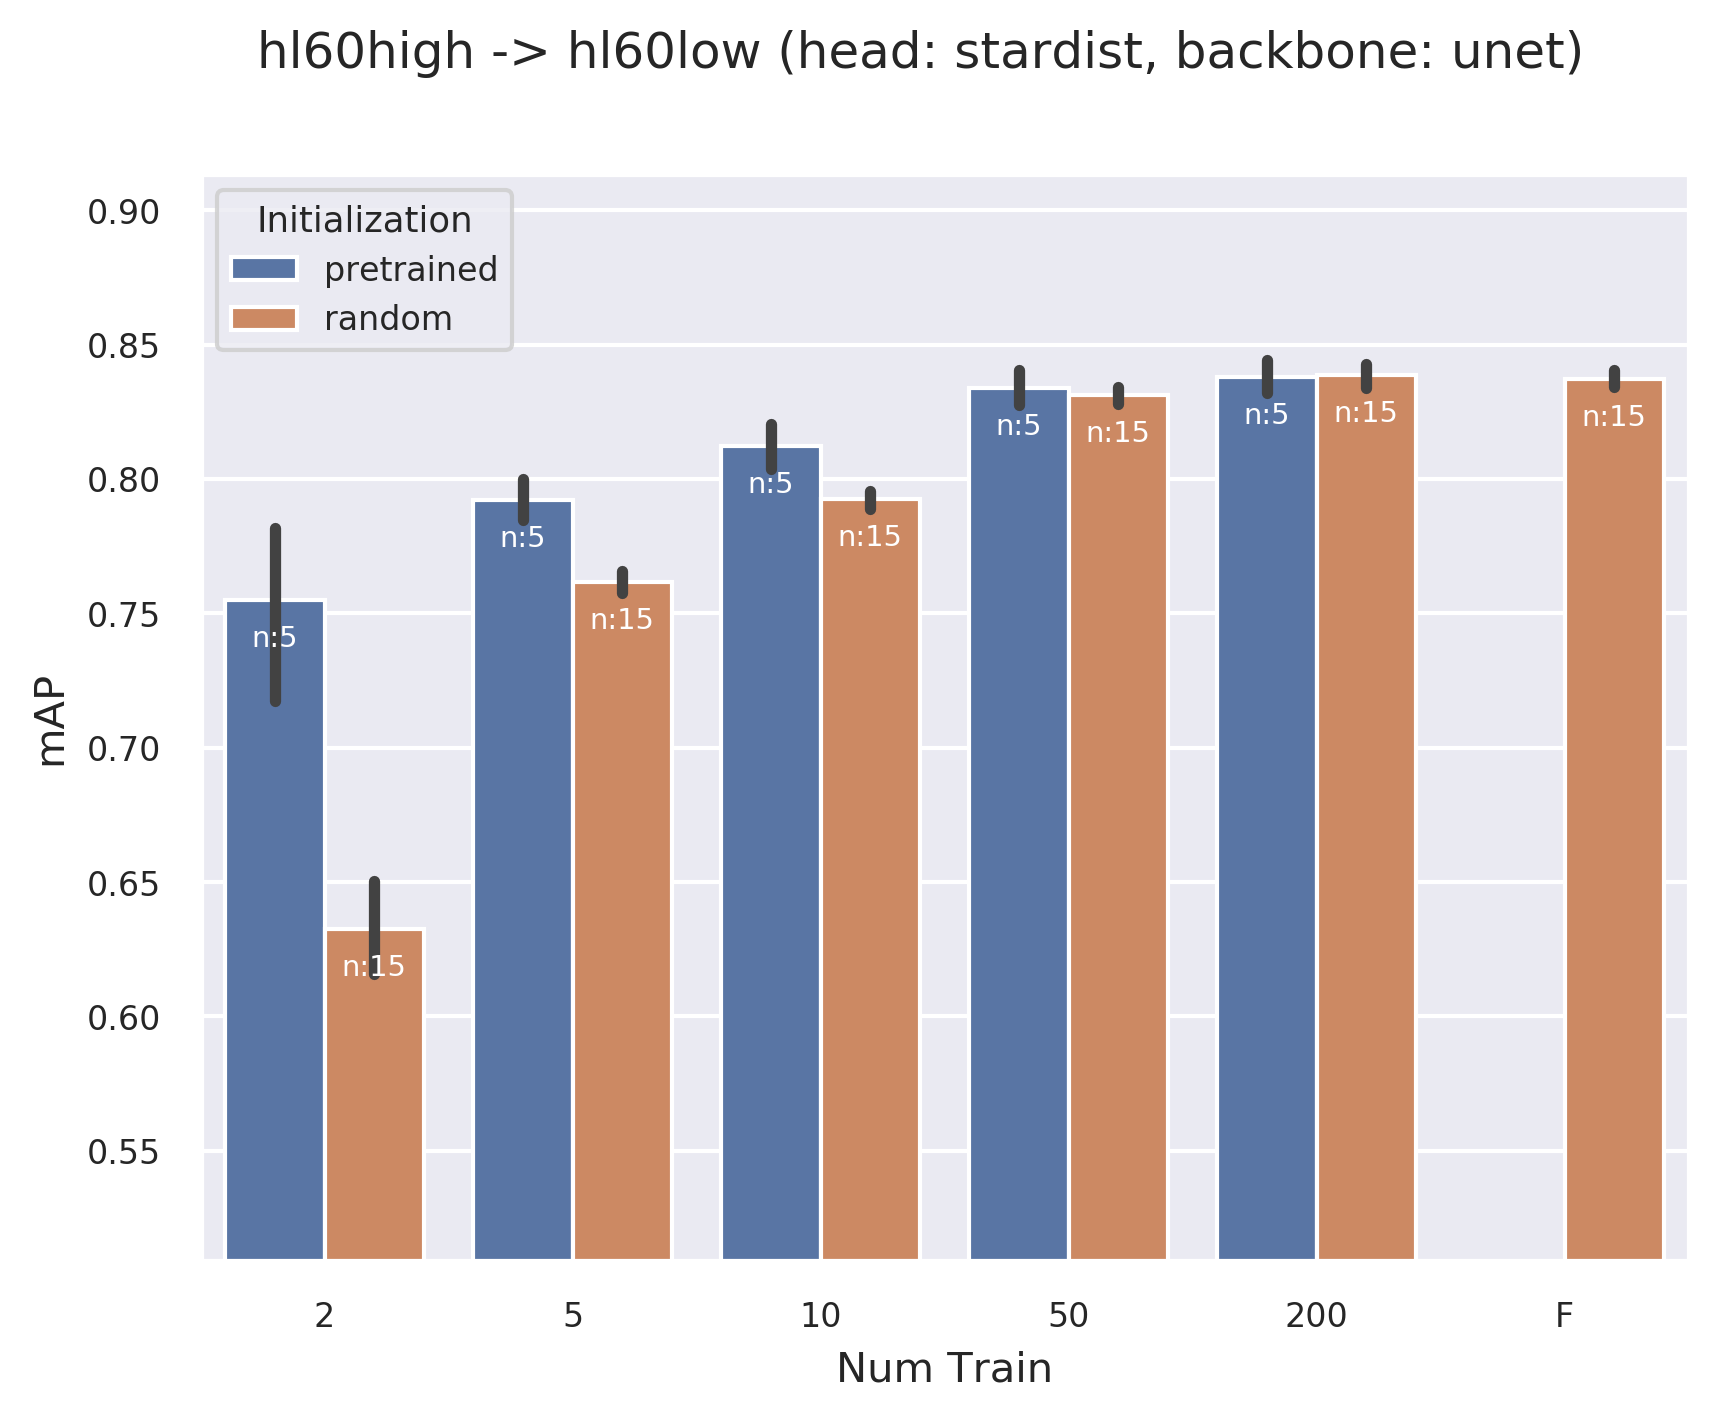

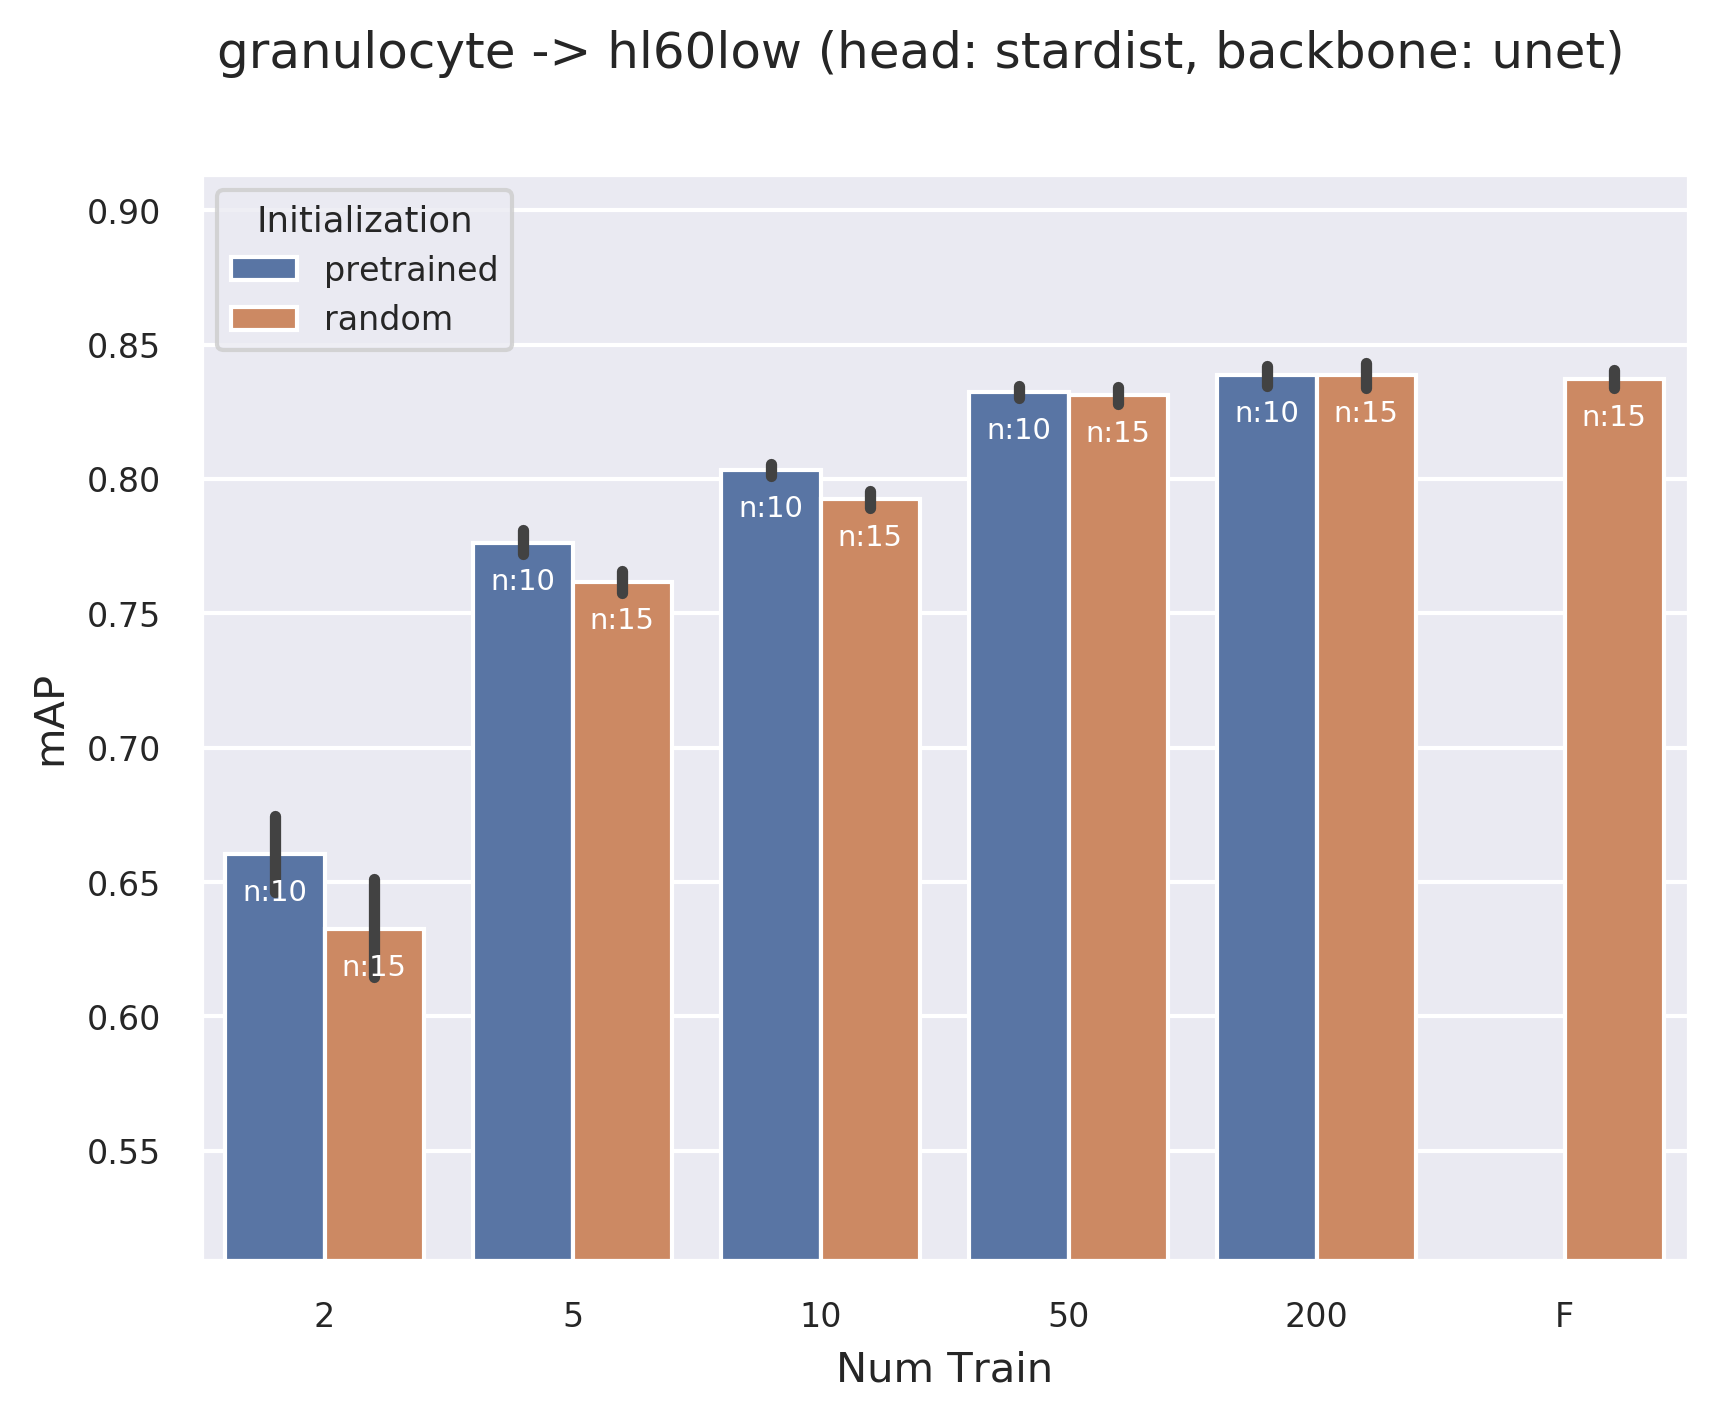

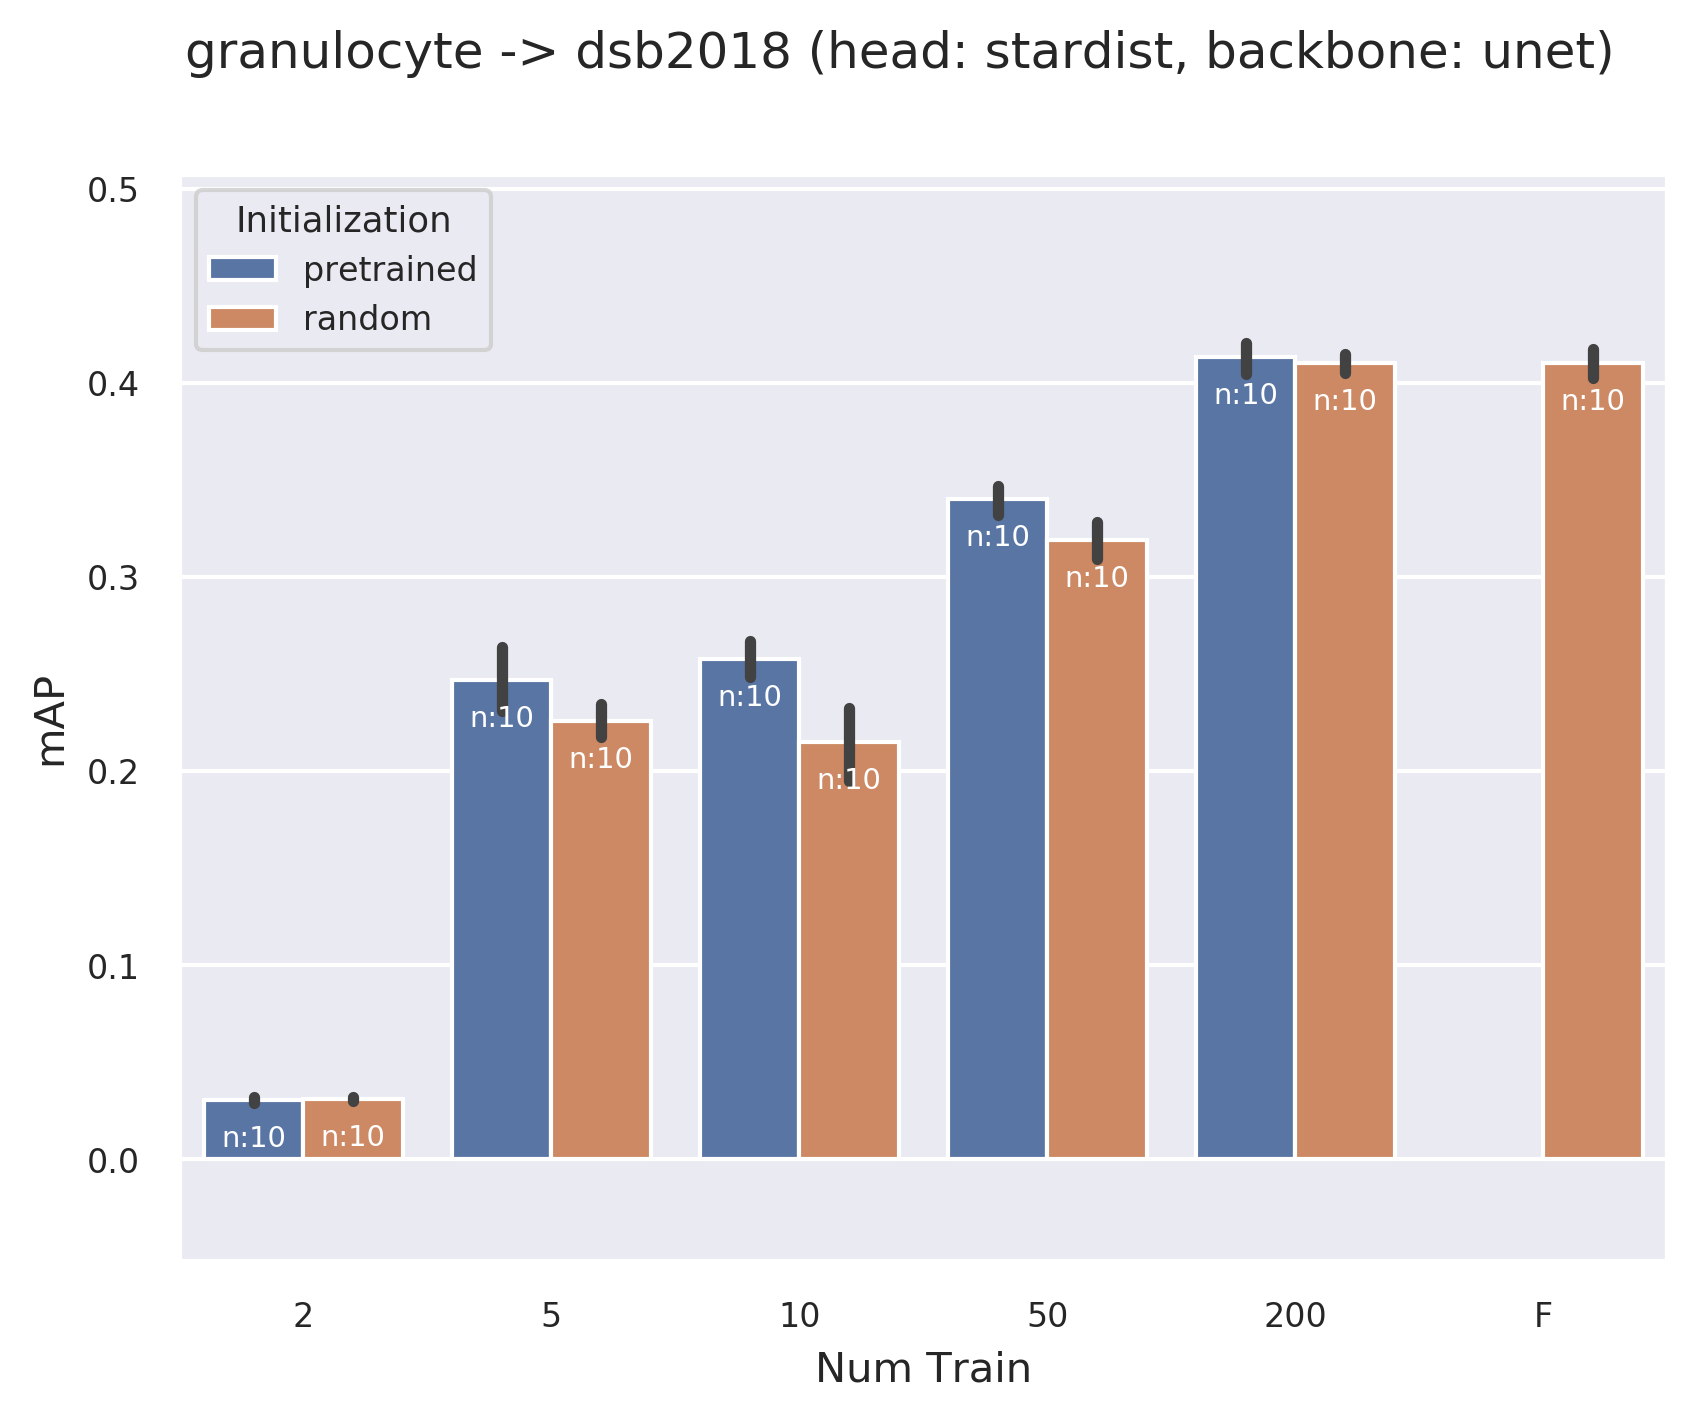

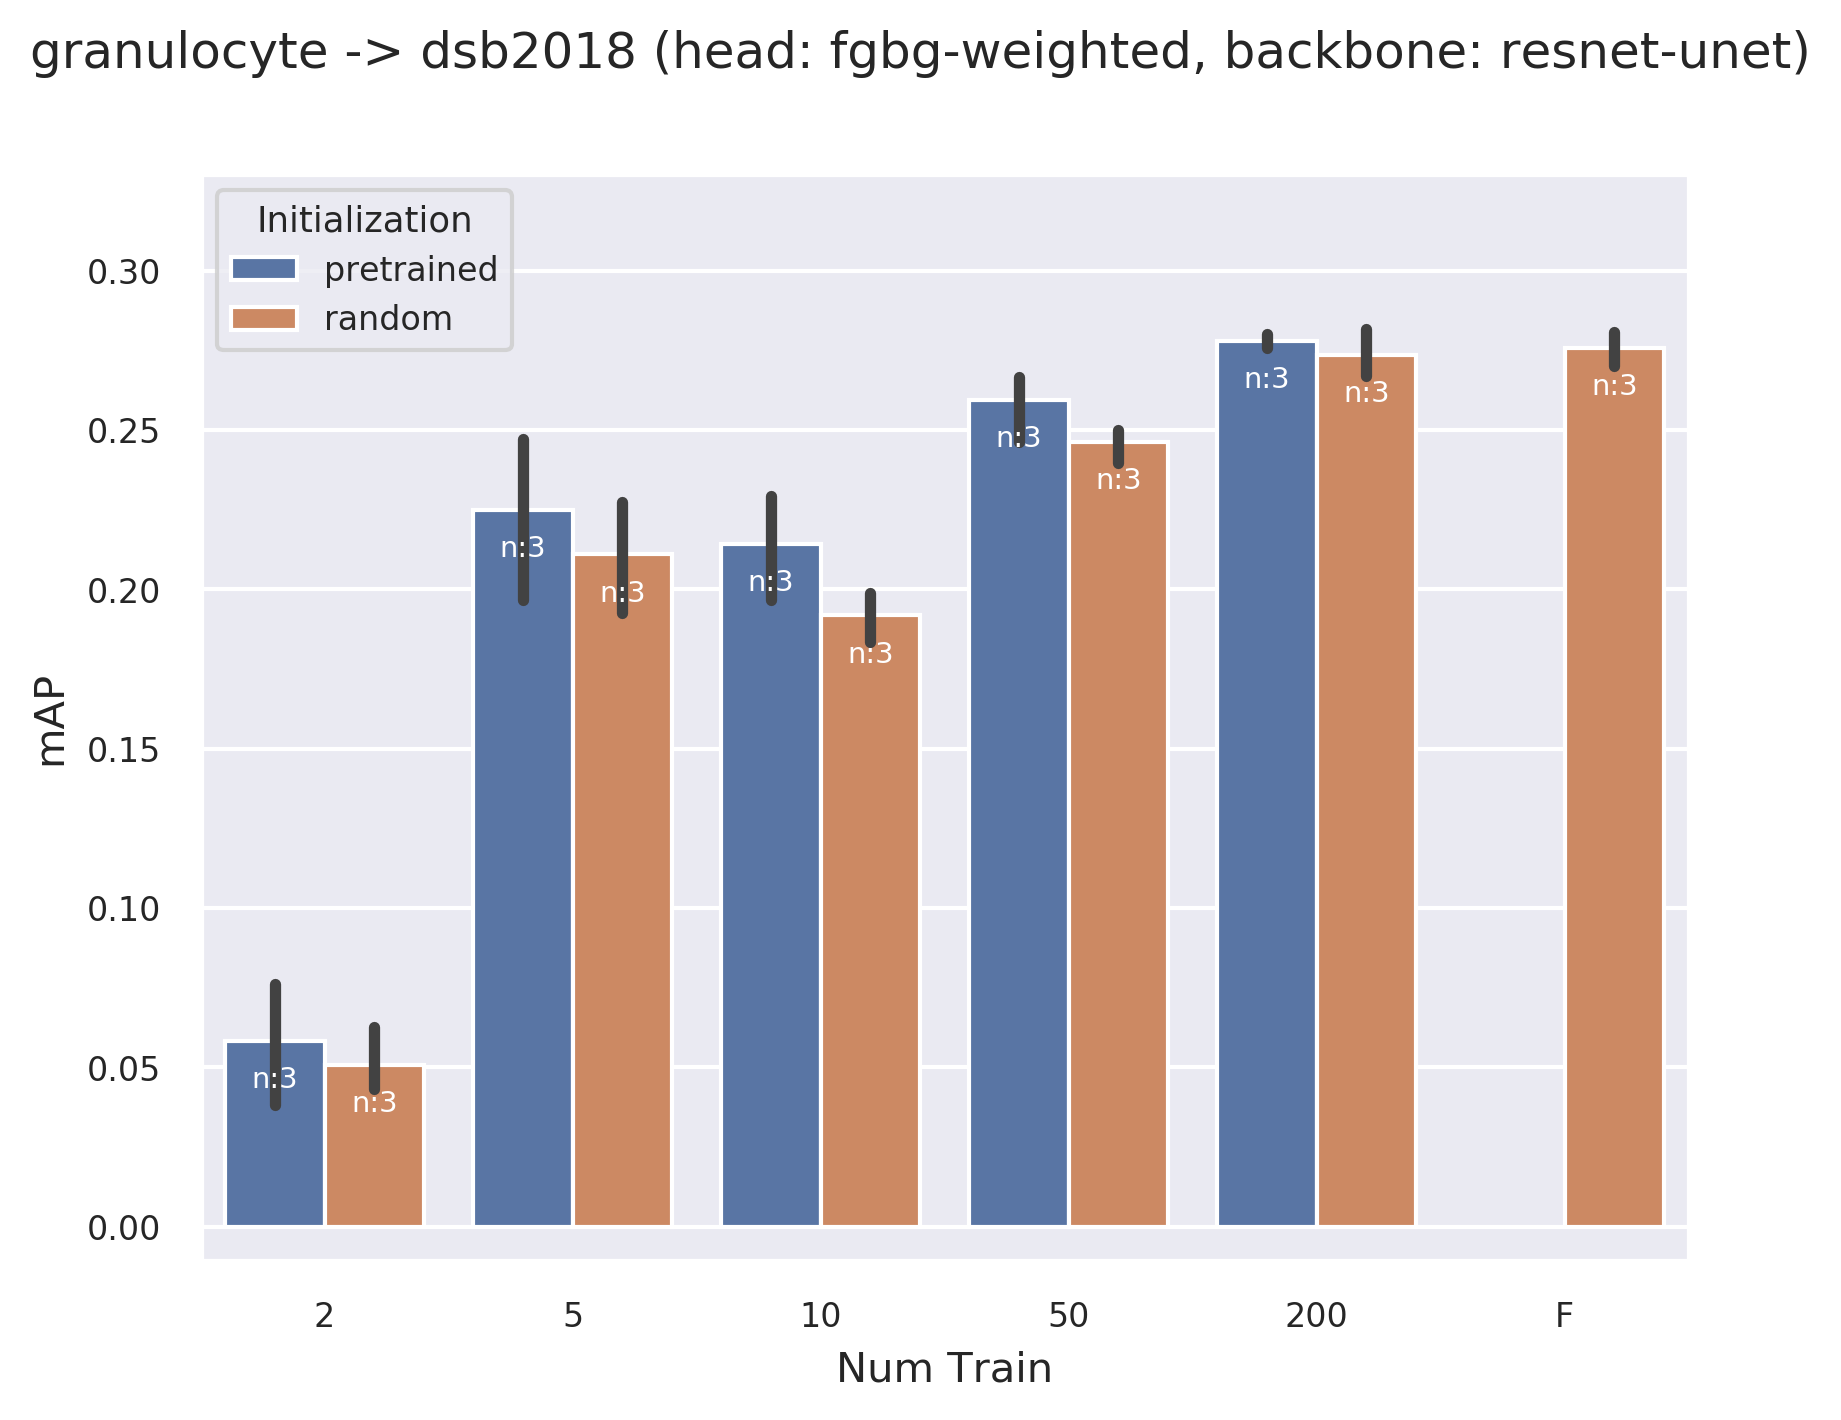

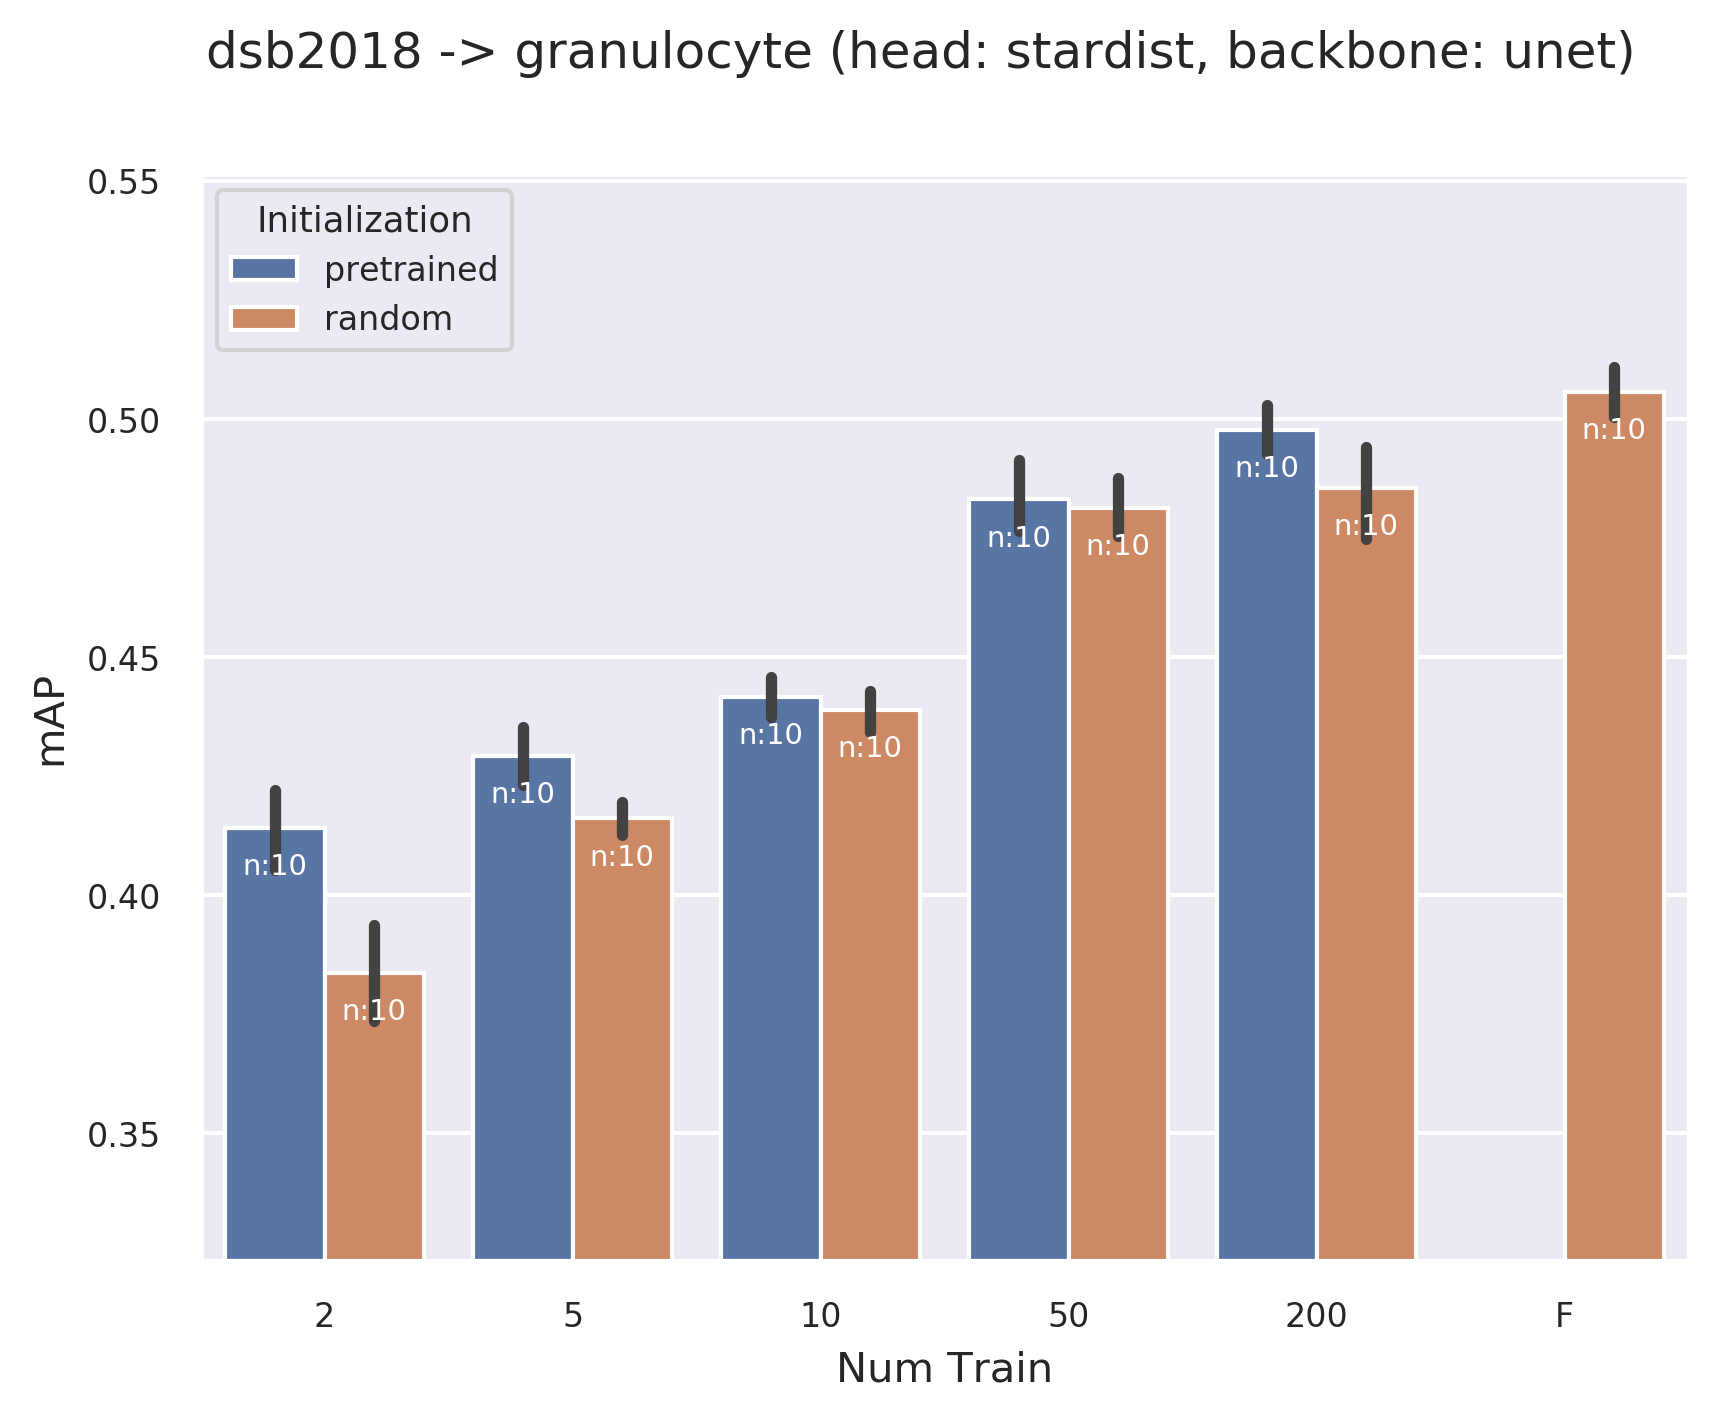

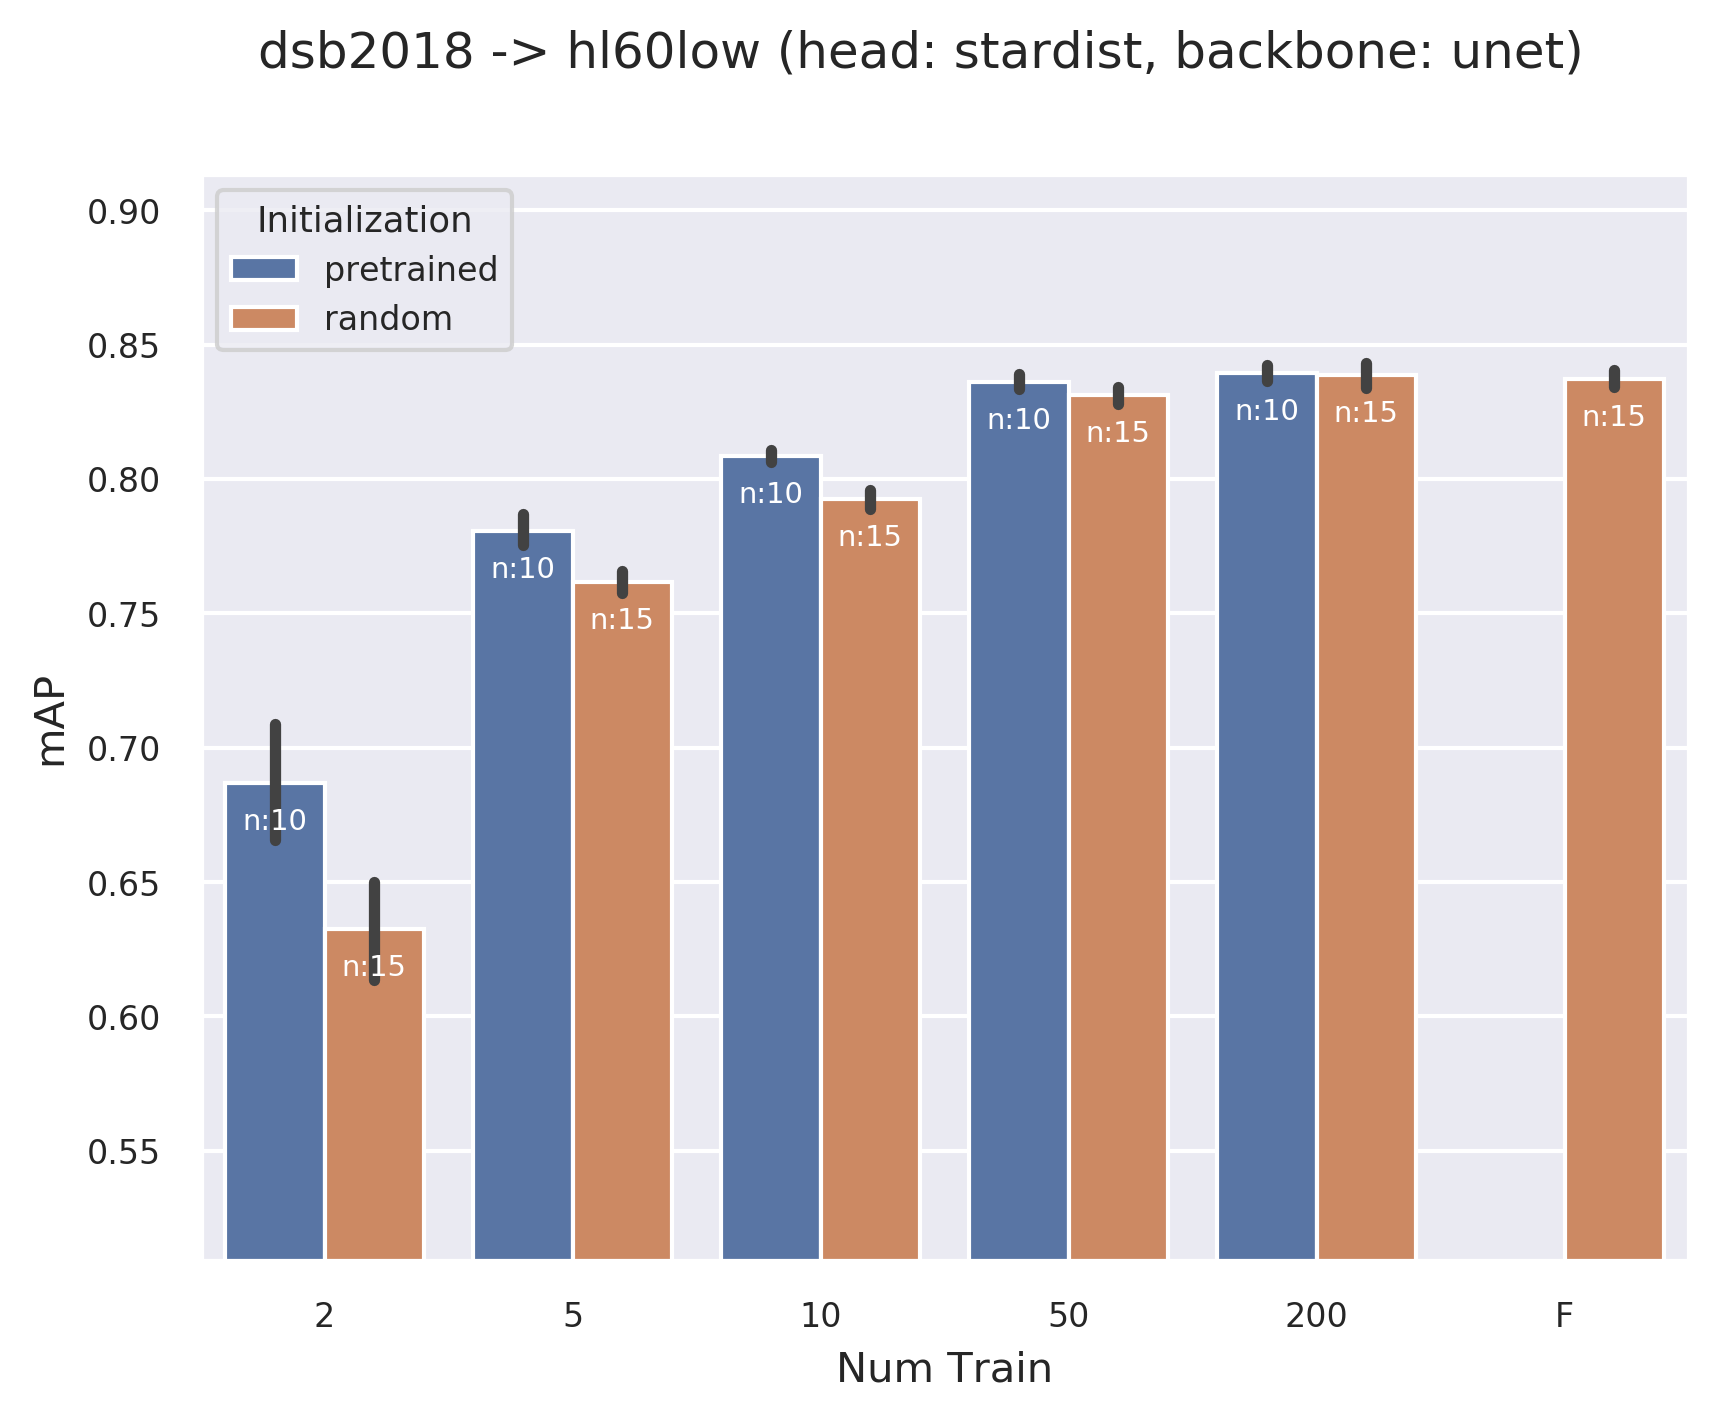

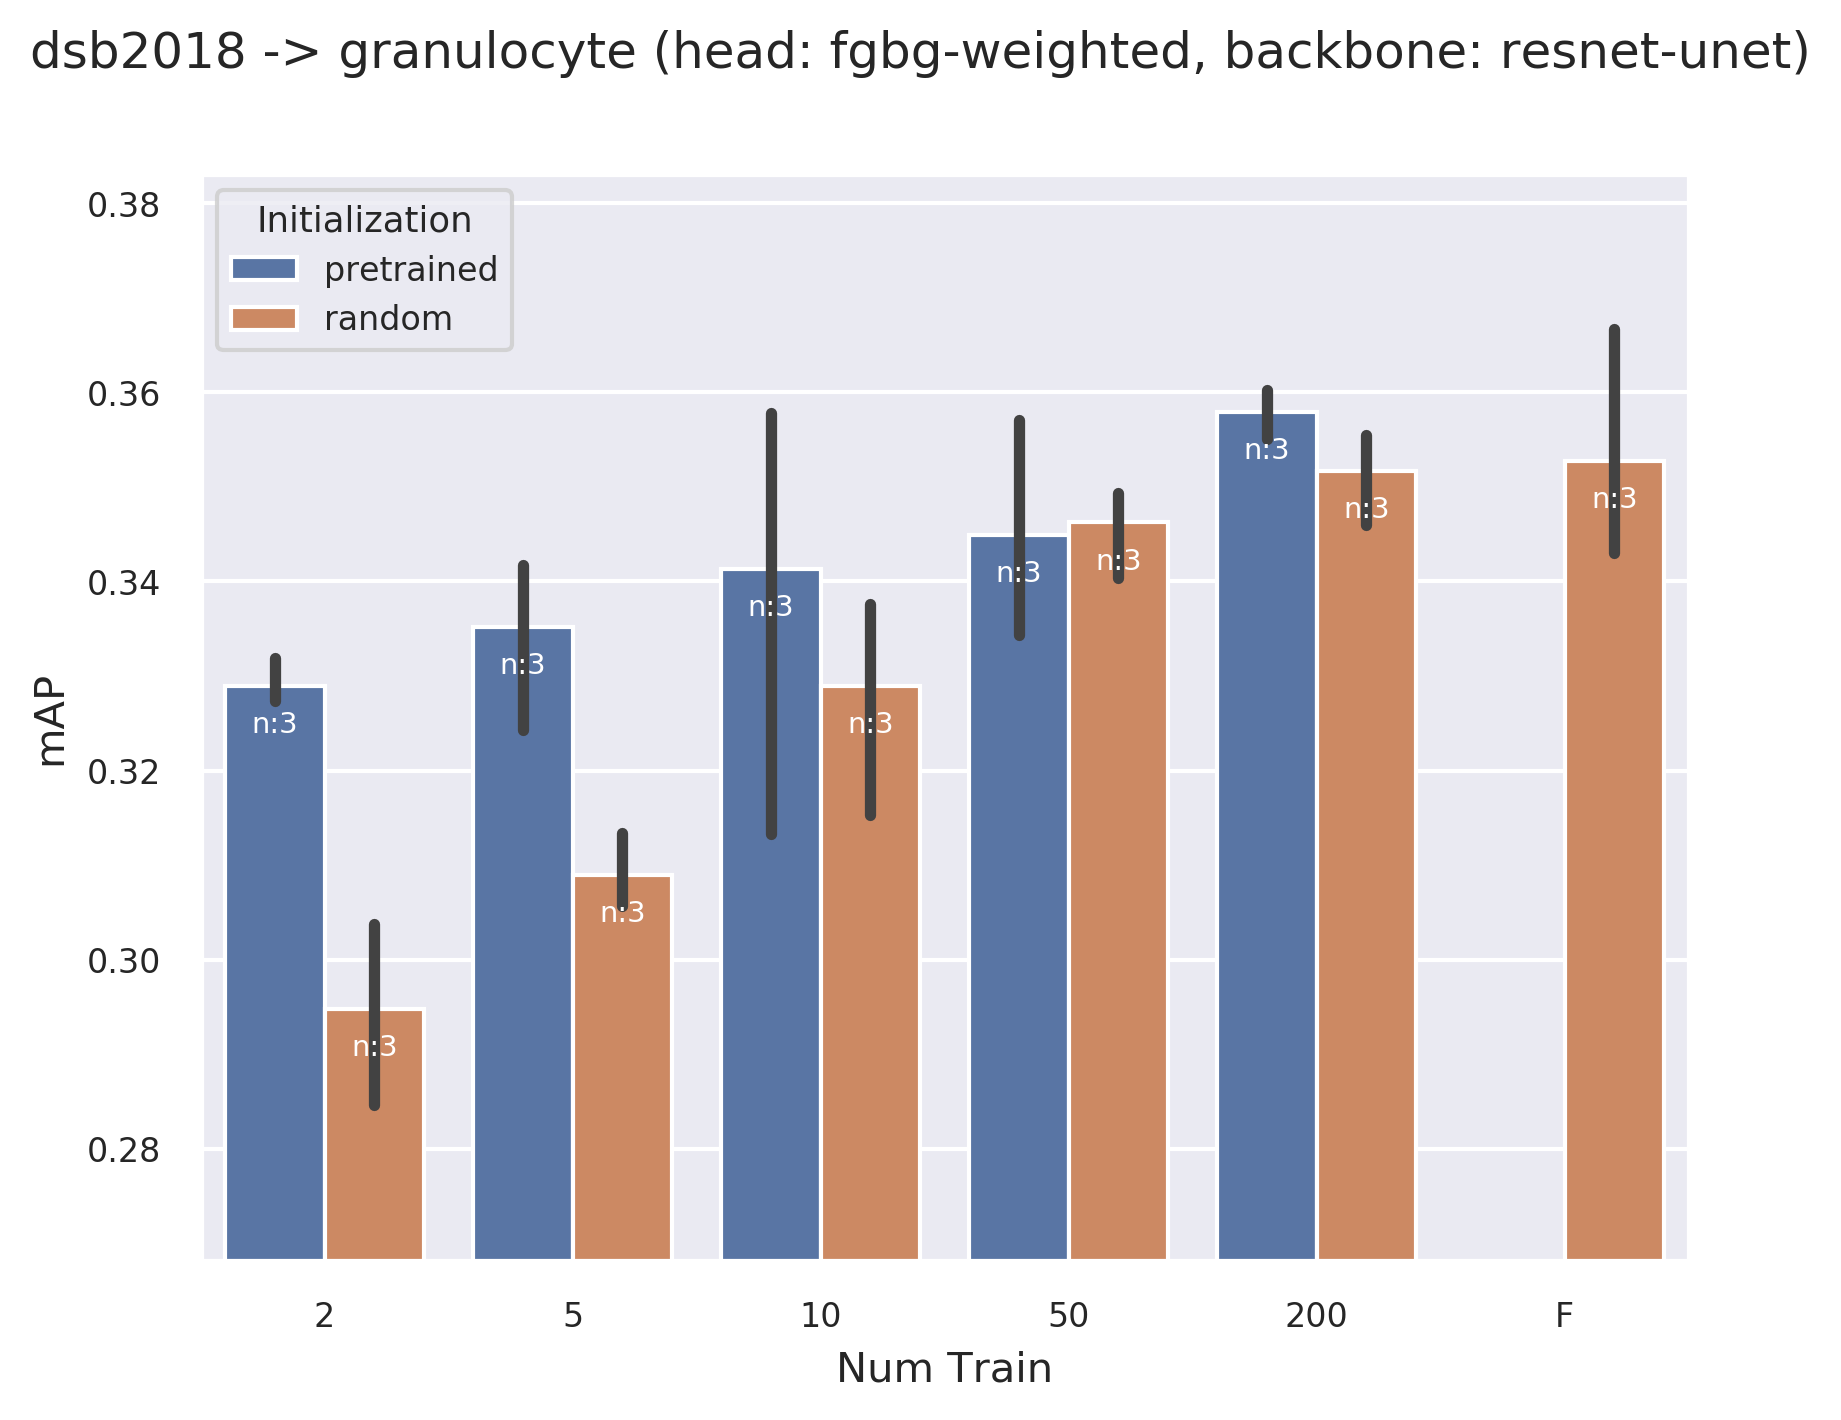

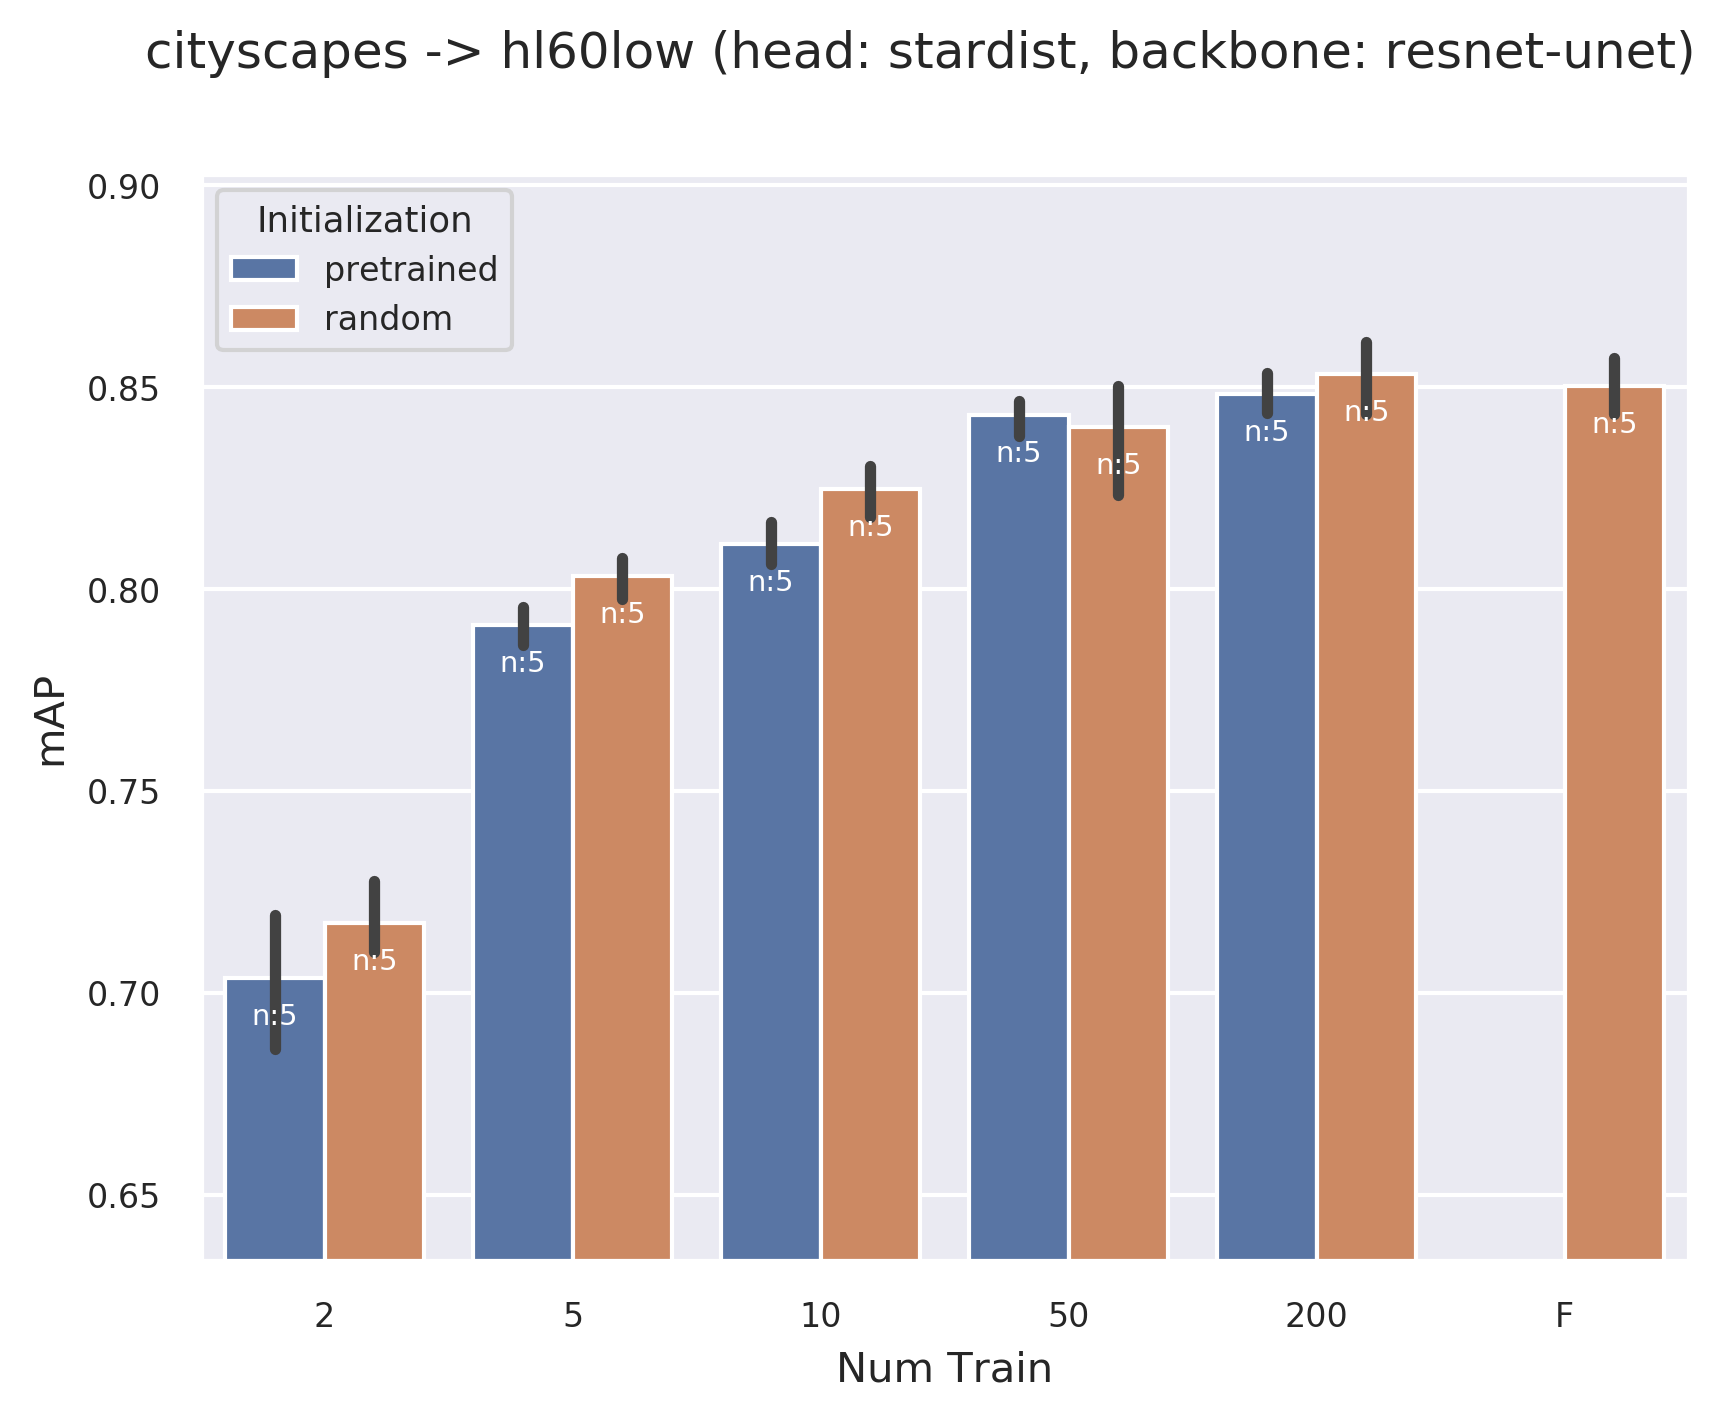

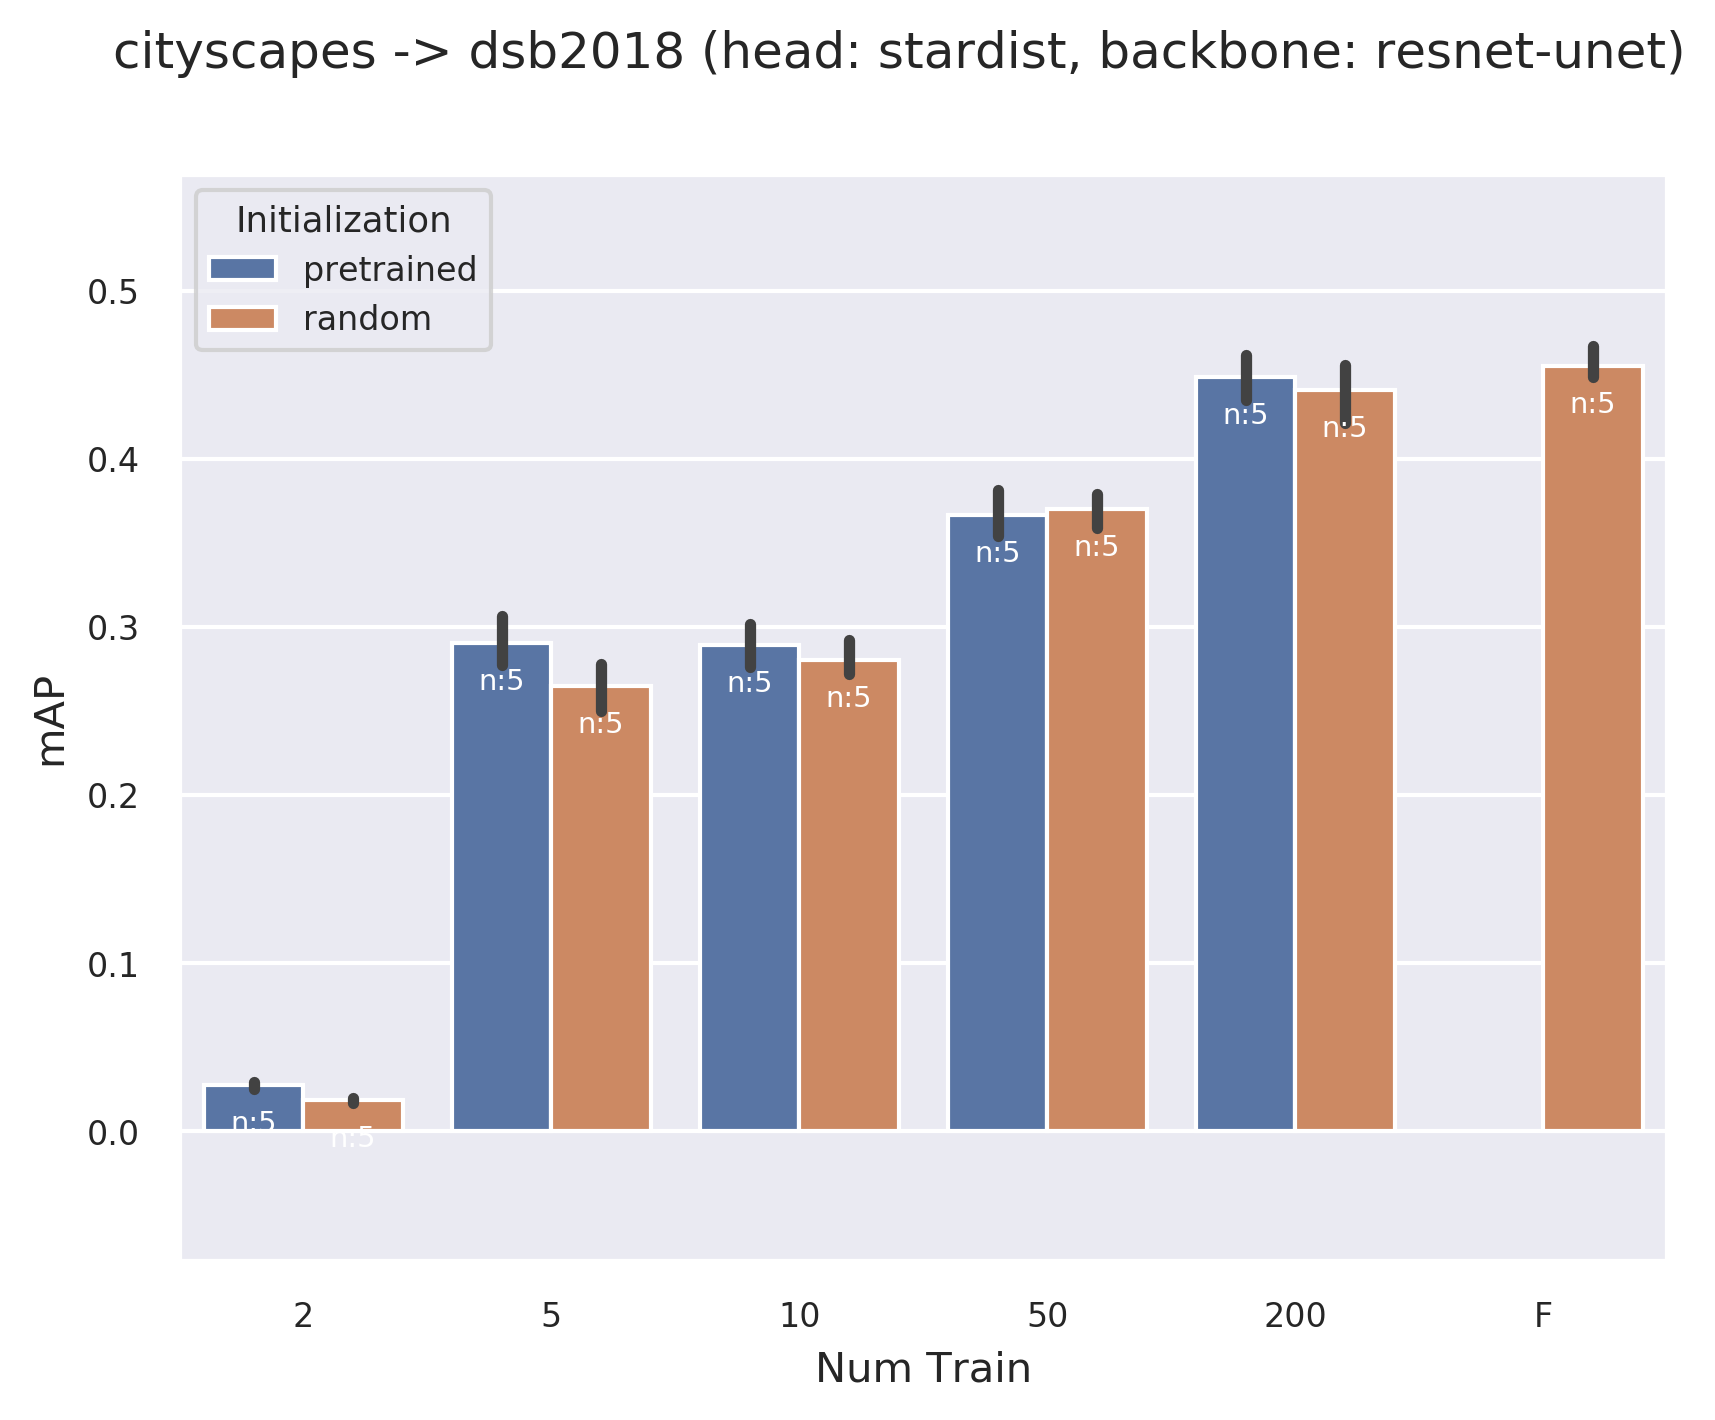

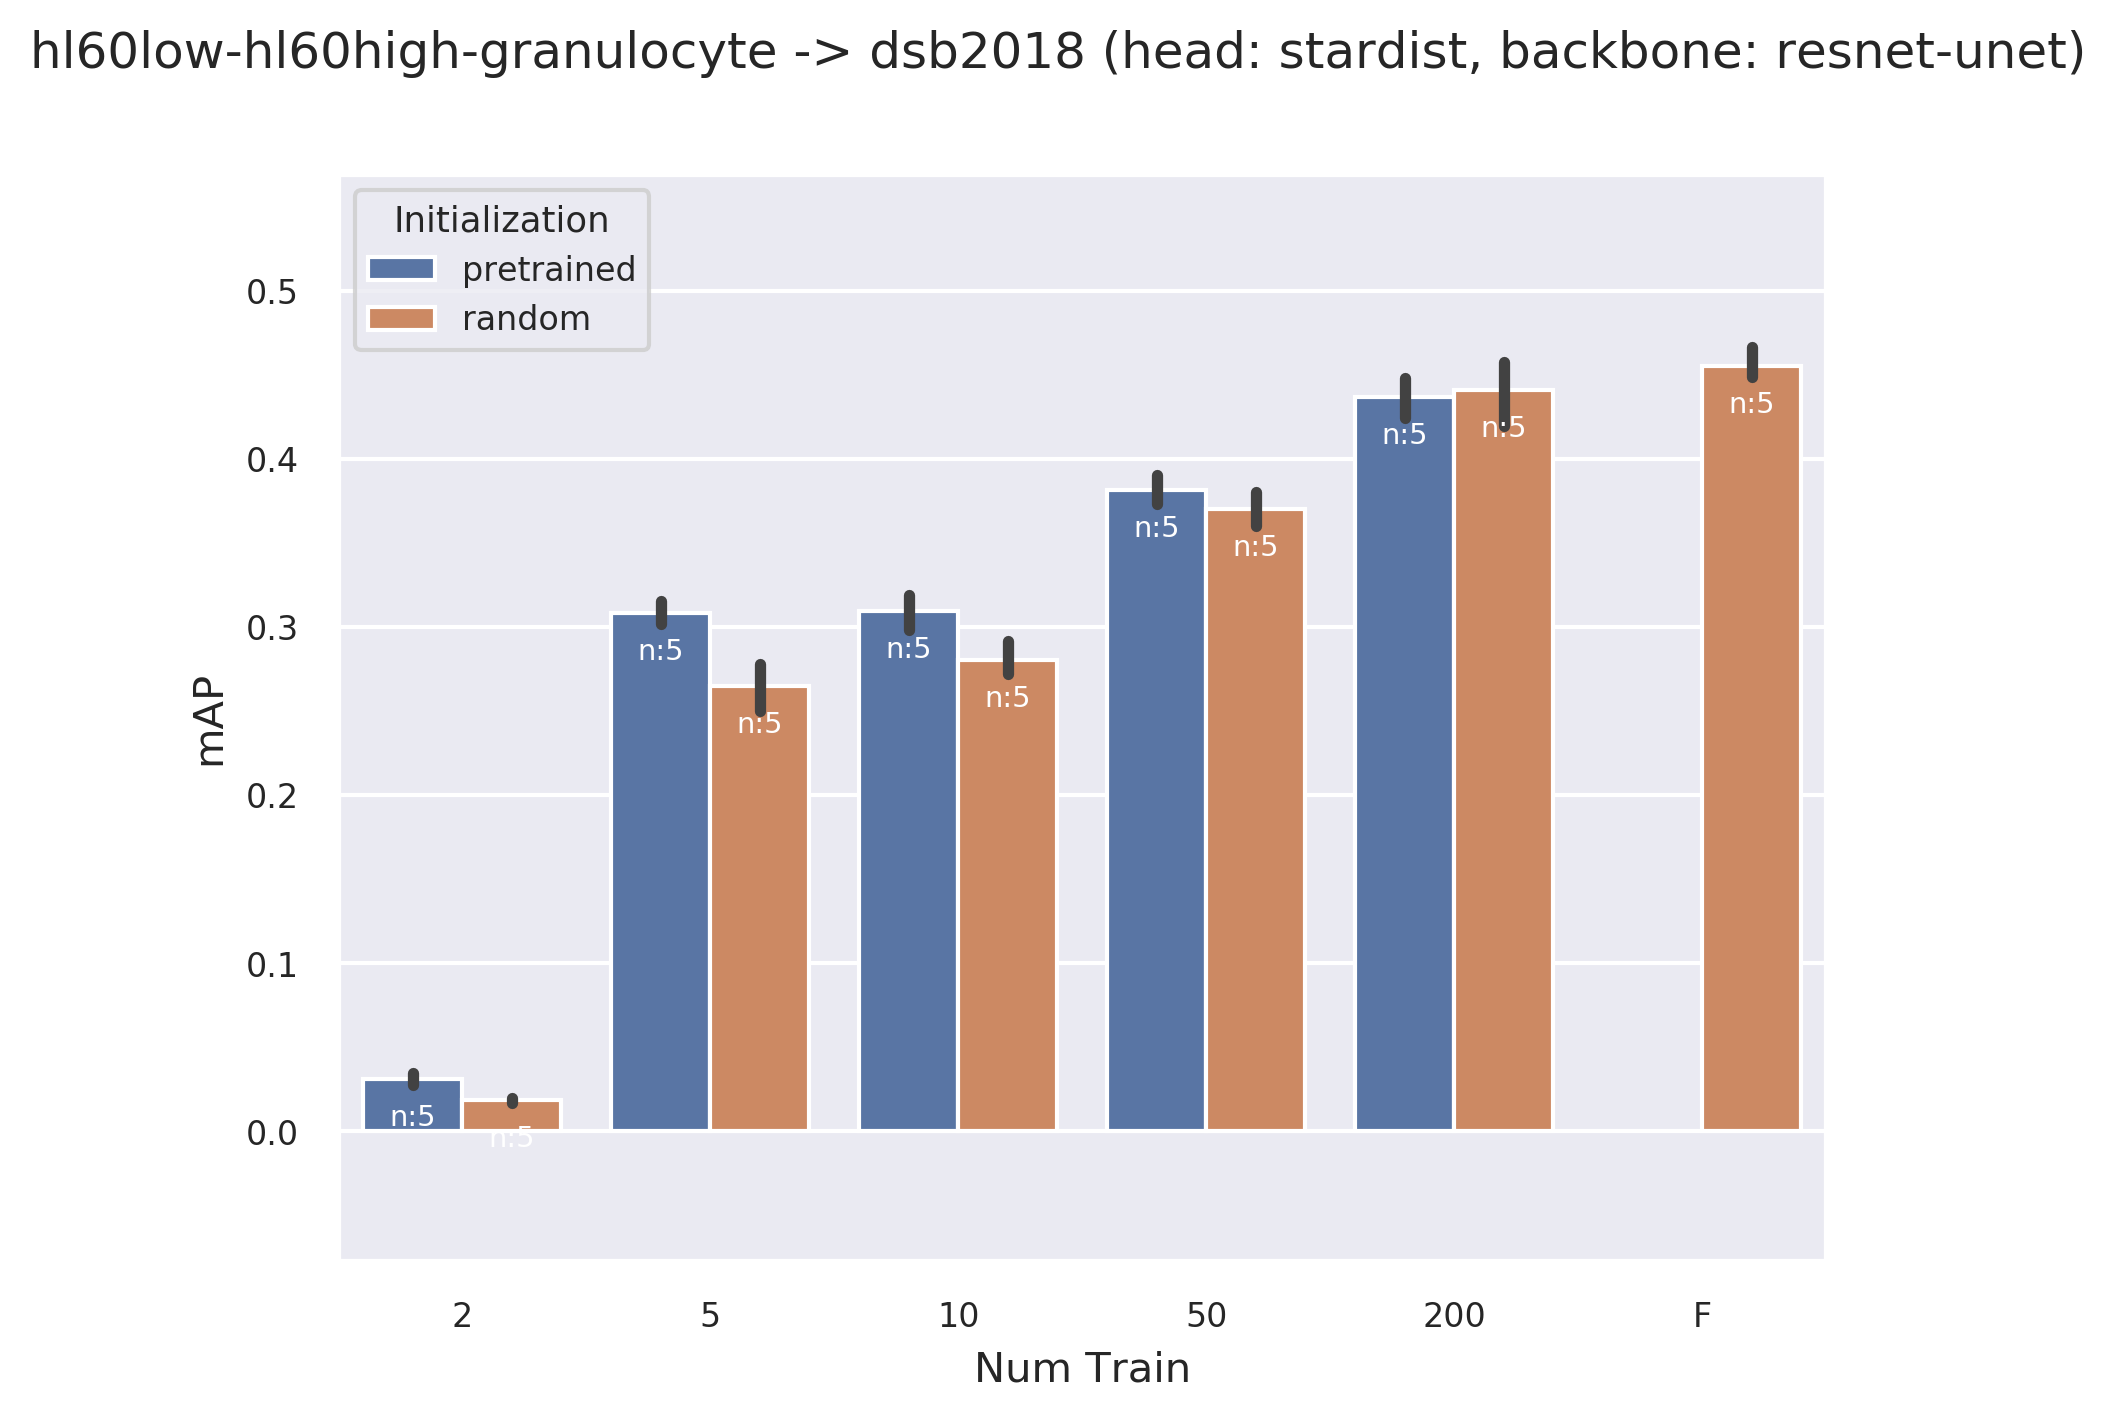

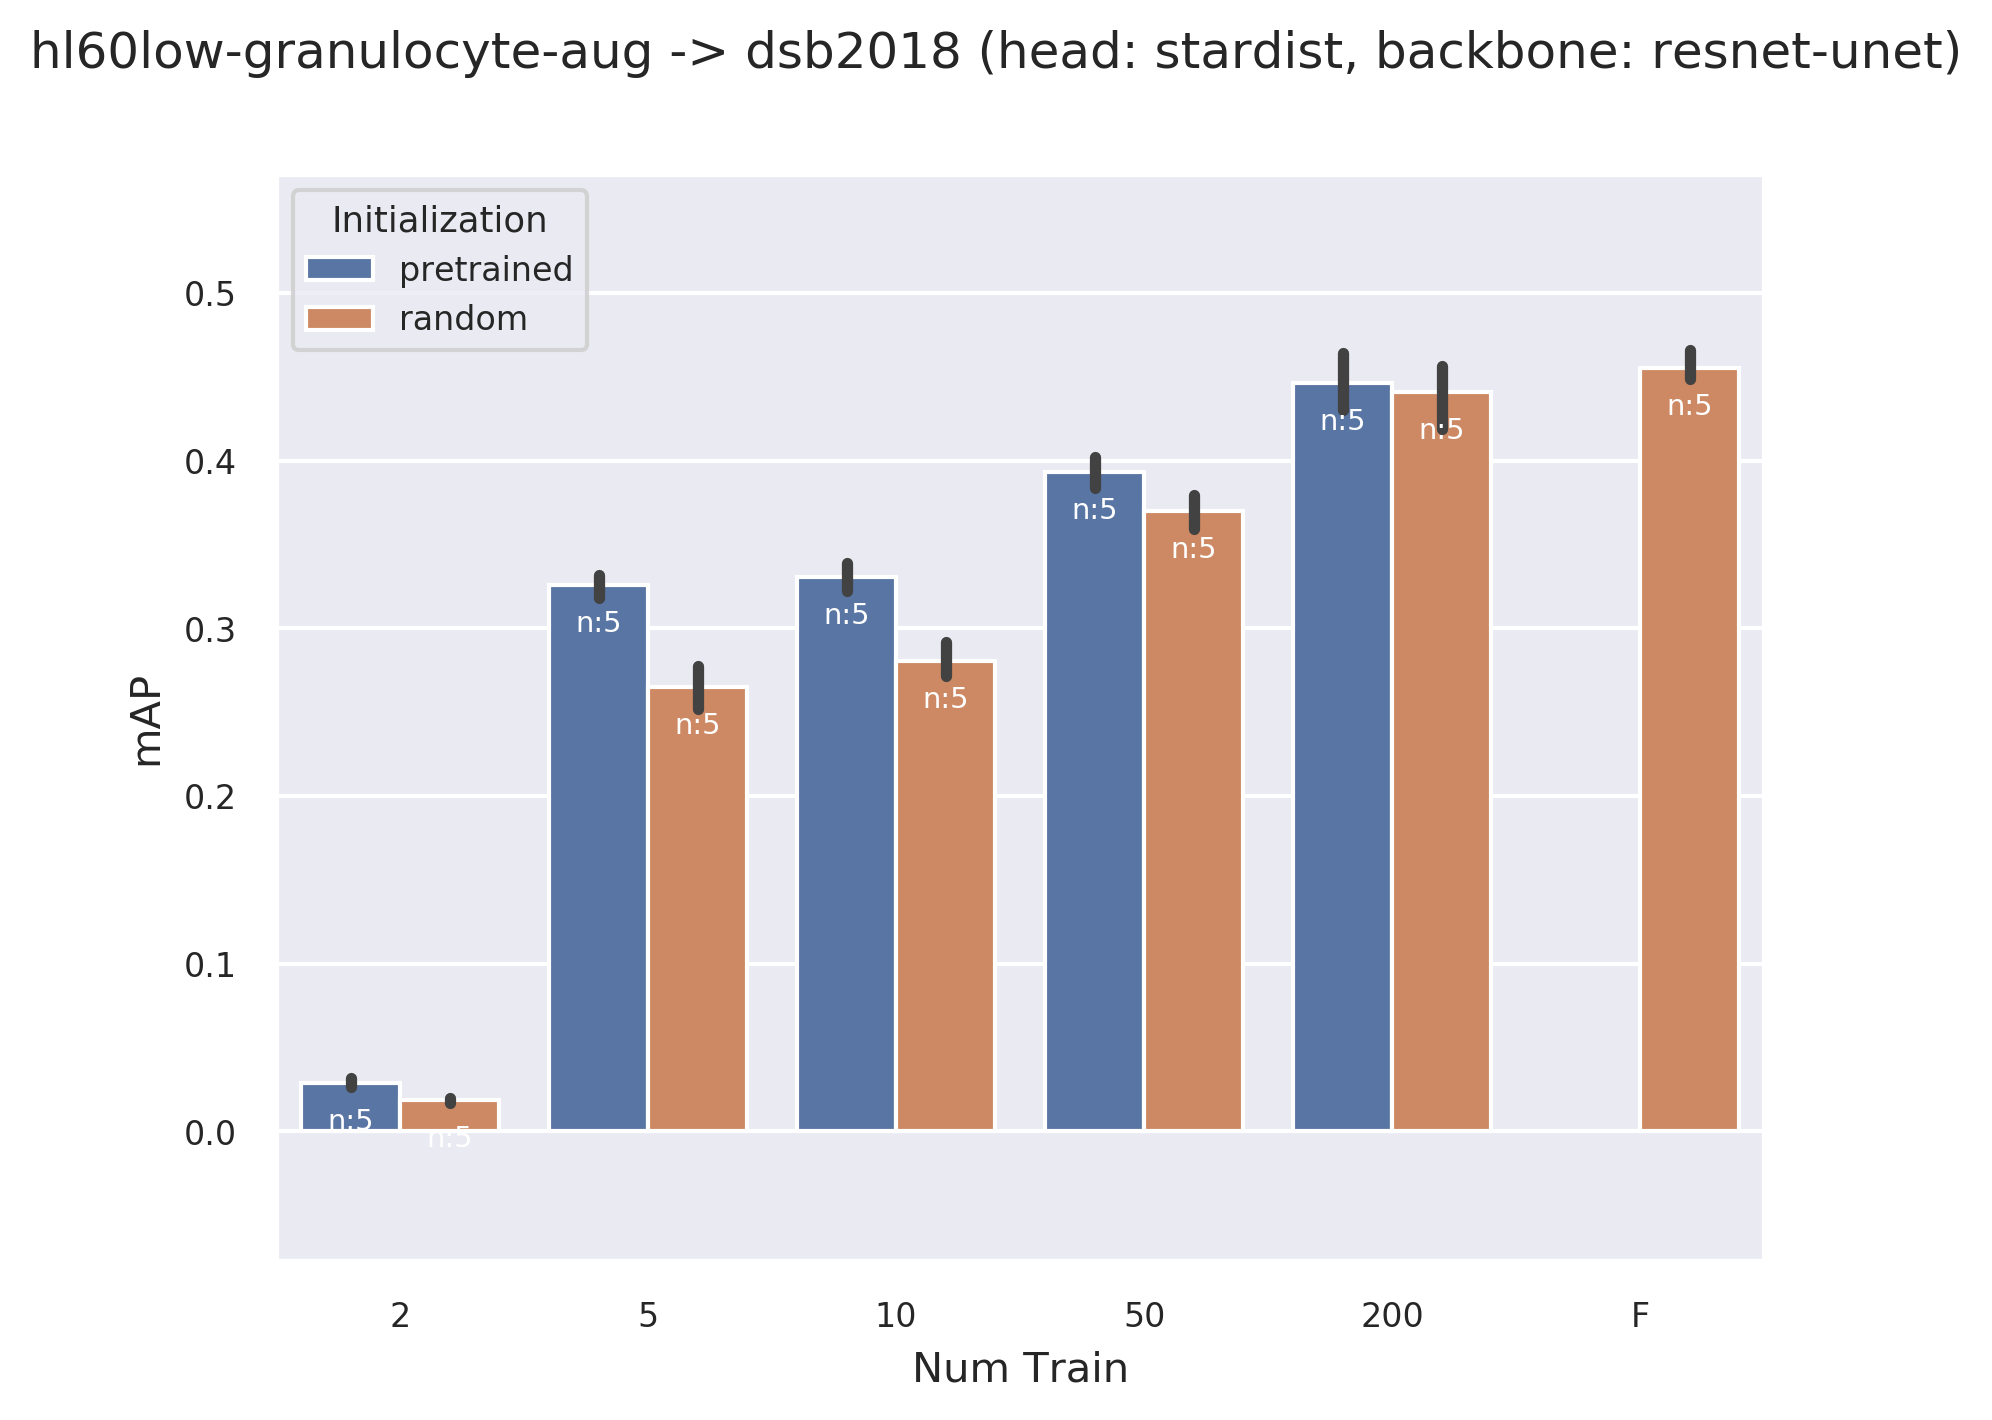

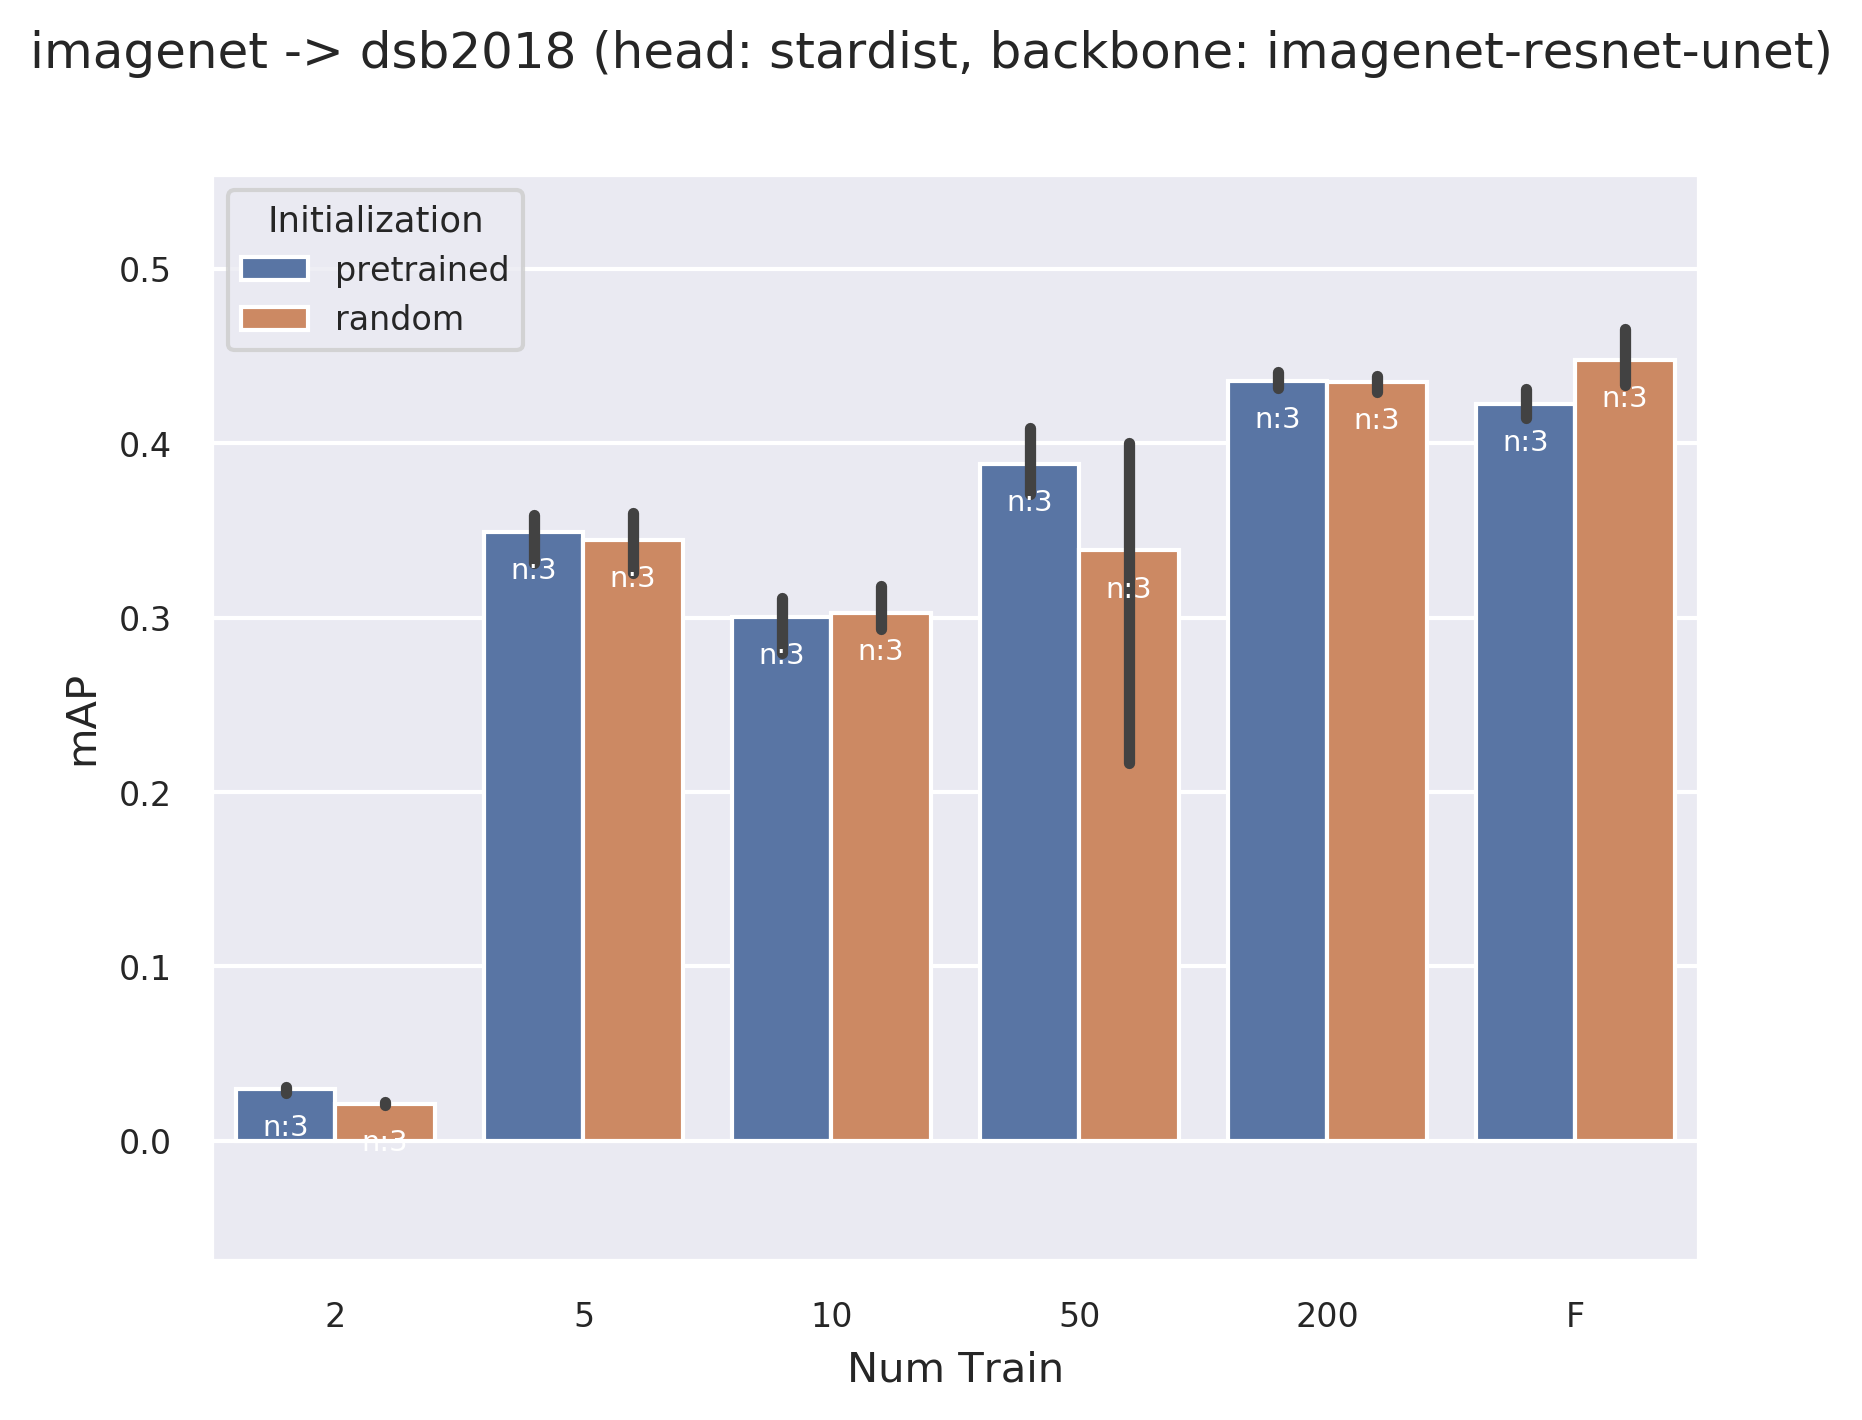

In [3]:
exps = [
    # HL60 Low Noise
    ('hl60low', 'hl60high', 'stardist', 'unet'),
    ('hl60low', 'granulocyte', 'stardist', 'unet'),
    ('hl60low', 'dsb2018', 'stardist', 'unet'),
    
    # HL60 High Noise
    ('hl60high', 'hl60low', 'stardist', 'unet'),
    
    # Granulocyte
    ('granulocyte', 'hl60low', 'stardist', 'unet'),
    ('granulocyte', 'dsb2018', 'stardist', 'unet'),
    ('granulocyte', 'dsb2018', 'fgbg-weighted', 'resnet-unet'),
    
    # DSB2018
    ('dsb2018', 'granulocyte', 'stardist', 'unet'),
    ('dsb2018', 'hl60low', 'stardist', 'unet'),
    ('dsb2018', 'granulocyte', 'fgbg-weighted', 'resnet-unet'),
    
    # Cityscapes
    ('cityscapes', 'hl60low', 'stardist', 'resnet-unet'),
    ('cityscapes', 'dsb2018', 'stardist', 'resnet-unet'),
    
    # Frankenstein
    ('hl60low-hl60high-granulocyte', 'dsb2018', 'stardist', 'resnet-unet'),
    ('hl60low-granulocyte-aug', 'dsb2018', 'stardist', 'resnet-unet'),
    
    # ImageNet
    ('imagenet', 'dsb2018', 'stardist', 'imagenet-resnet-unet')
]
for pre_data, data, head, backbone in exps:
    exp = f'(R/none|P/{pre_data})/{data}/{head}/{backbone}/.*'
    fig = visualize.plot_last(exp, 'ap_dsb2018#mean', ignore_run=True)
    fig.suptitle('{} -> {} (head: {}, backbone: {})'.format(pre_data, data, head, backbone))
    fig.savefig(f'/tmp/bachelorthesis-plots/{pre_data}_{data}_{head}_{backbone}.png', bbox_inches='tight')
    fig.show()

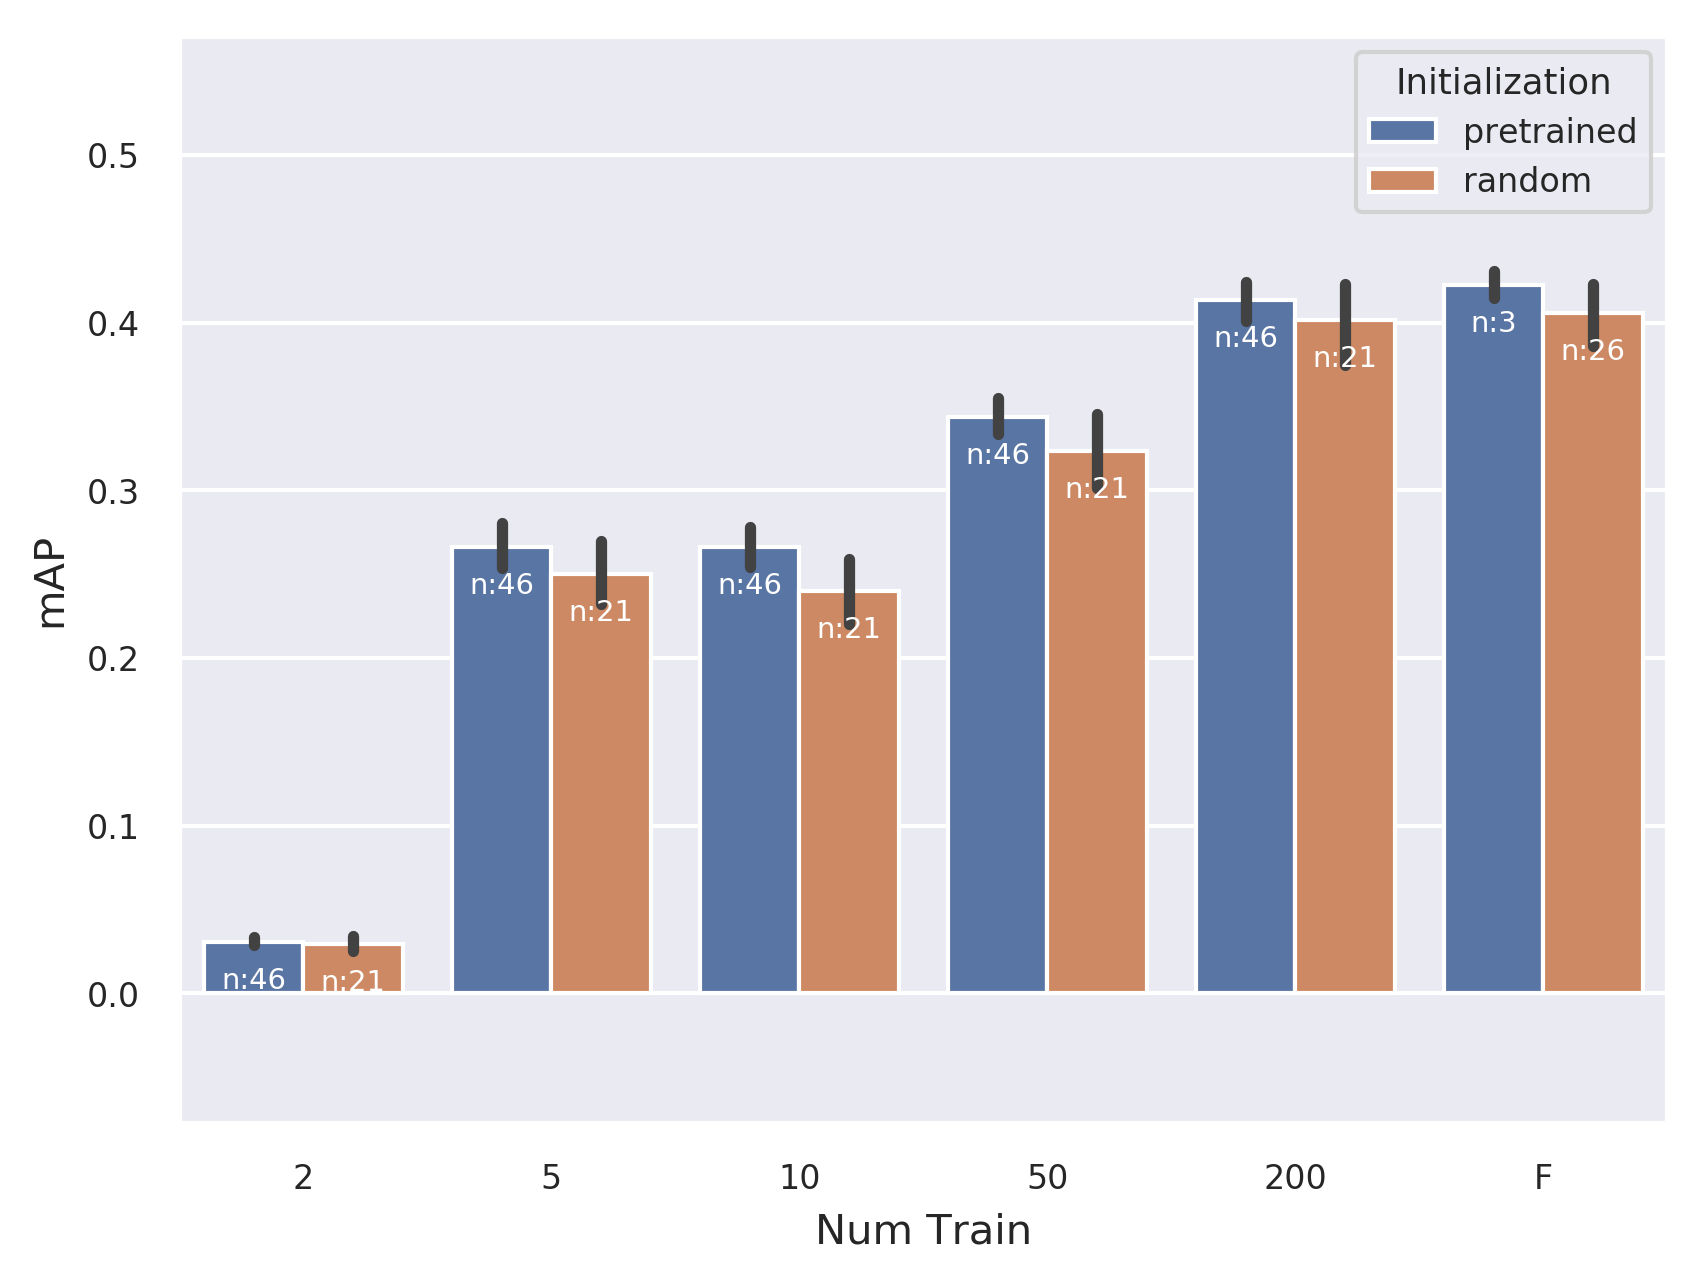

In [4]:
fig = visualize.plot_last('(R|P)/.*/dsb2018/.*', 'ap_dsb2018#mean',
                          ignore_backbone=True, ignore_head=True, ignore_run=True, ignore_pre_data=True)

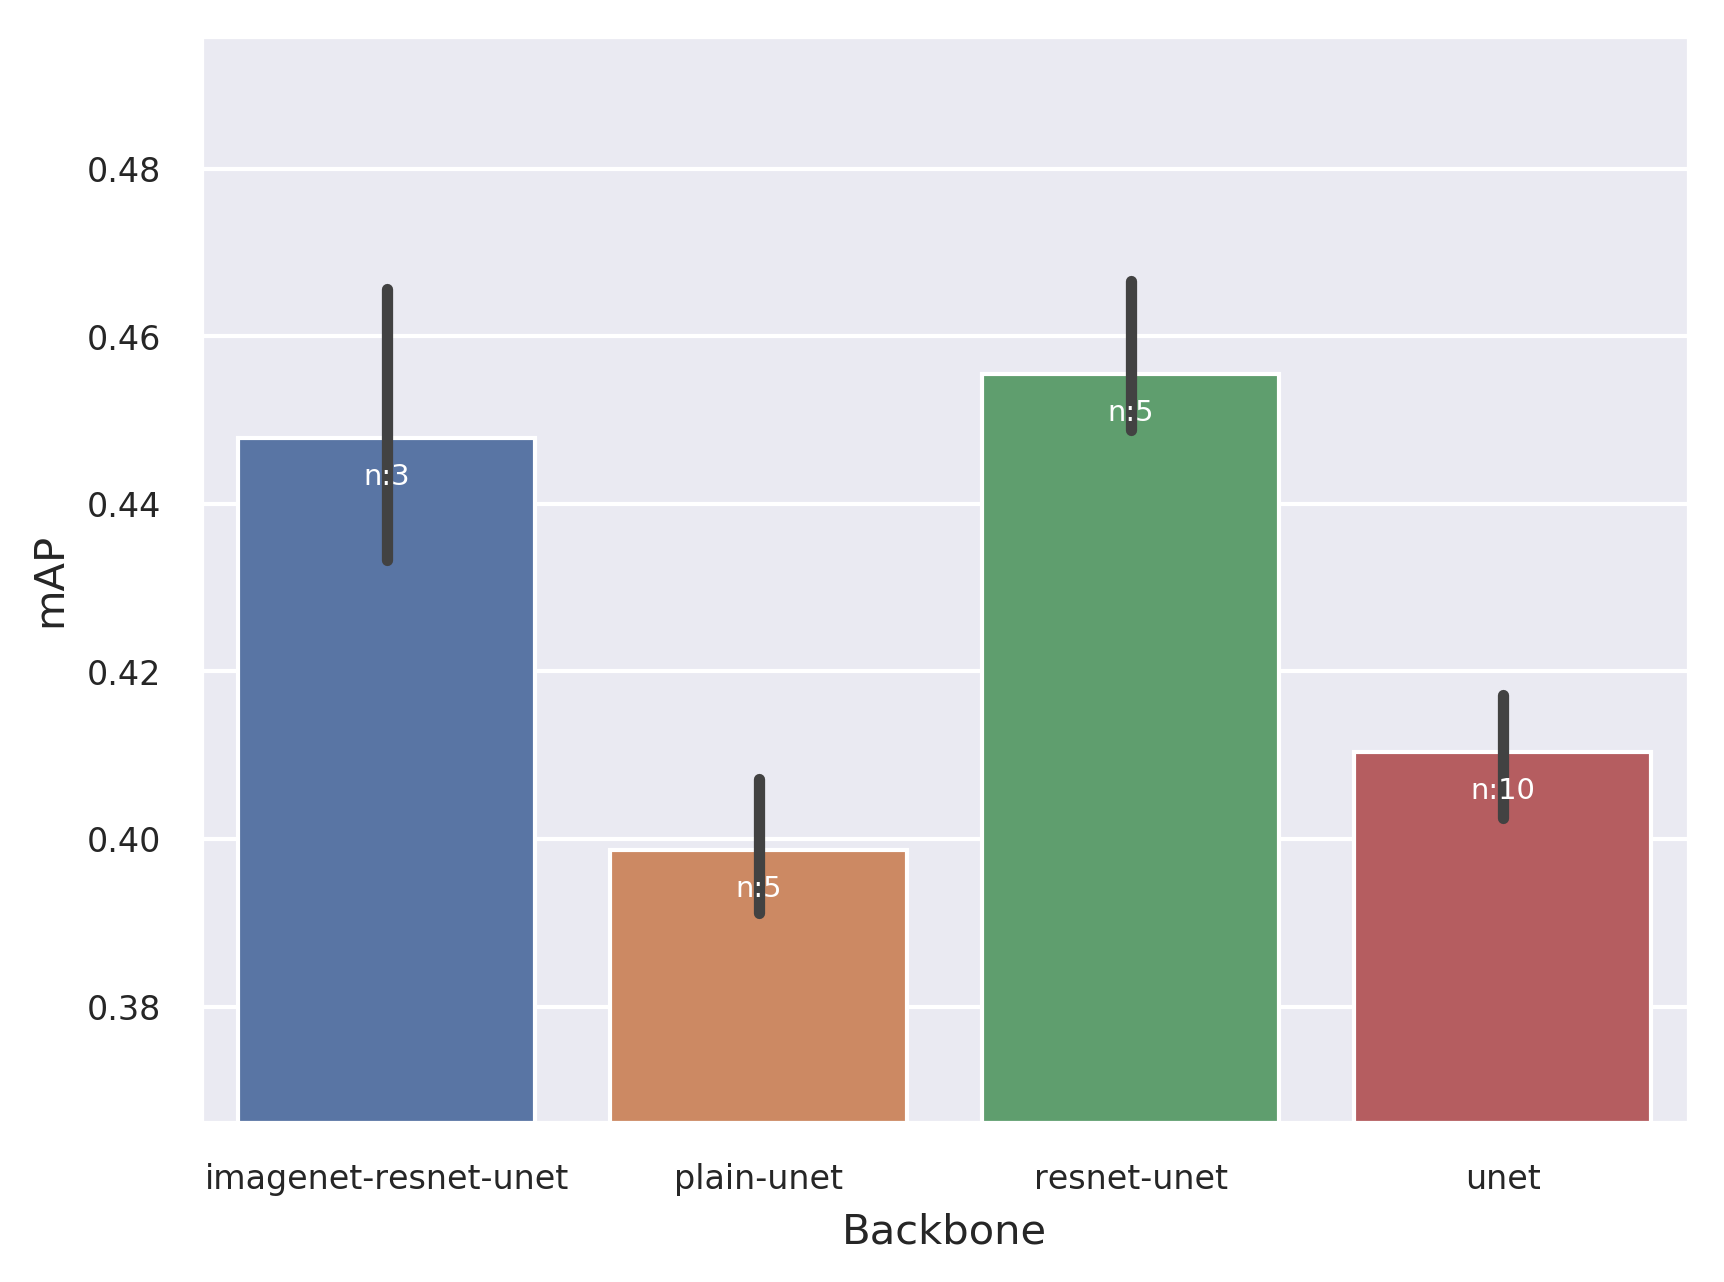

In [5]:
fig = visualize.plot_last('R/.*/dsb2018/stardist/.*/F/.*', 'ap_dsb2018#mean',
                          ignore_run=True)

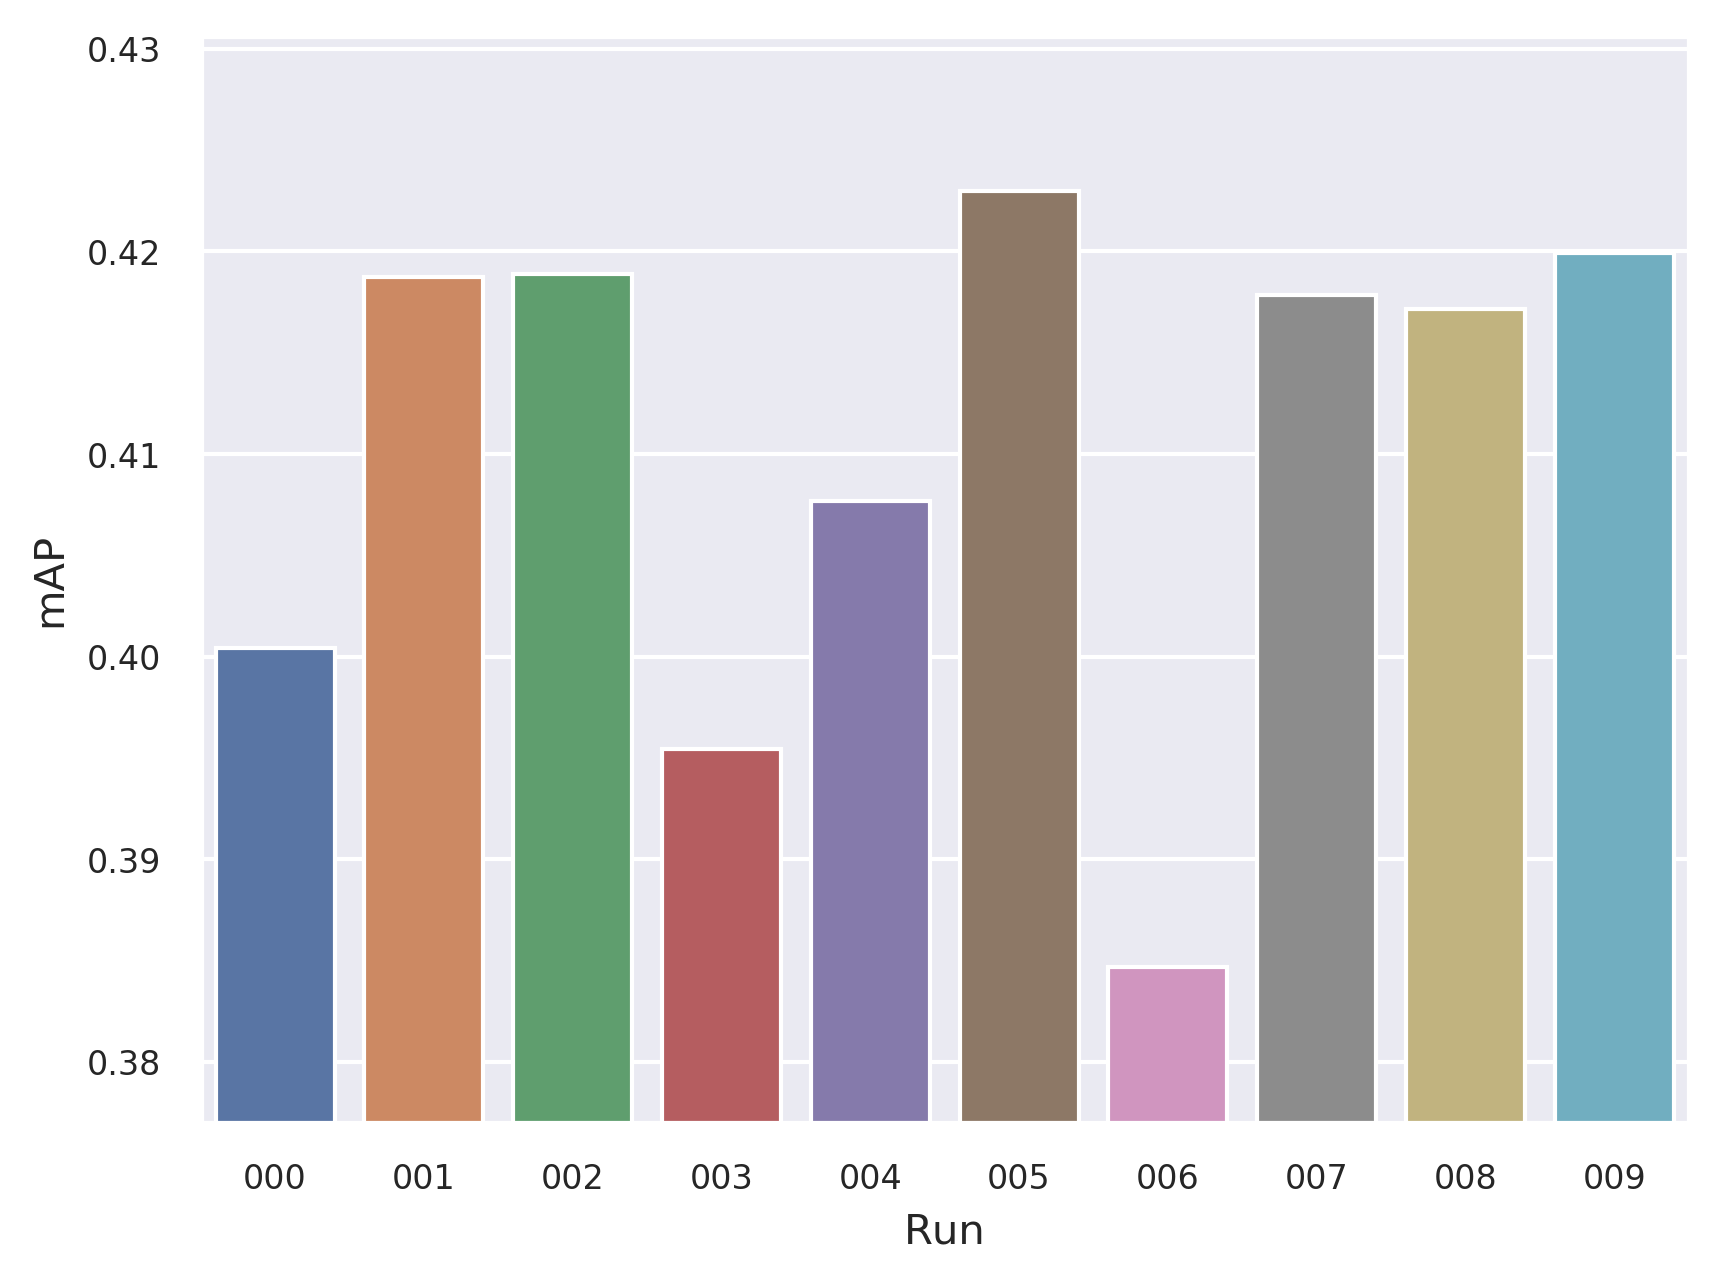

In [6]:
fig = visualize.plot_last('R/none/dsb2018/stardist/unet/F/.*', 'ap_dsb2018#mean')

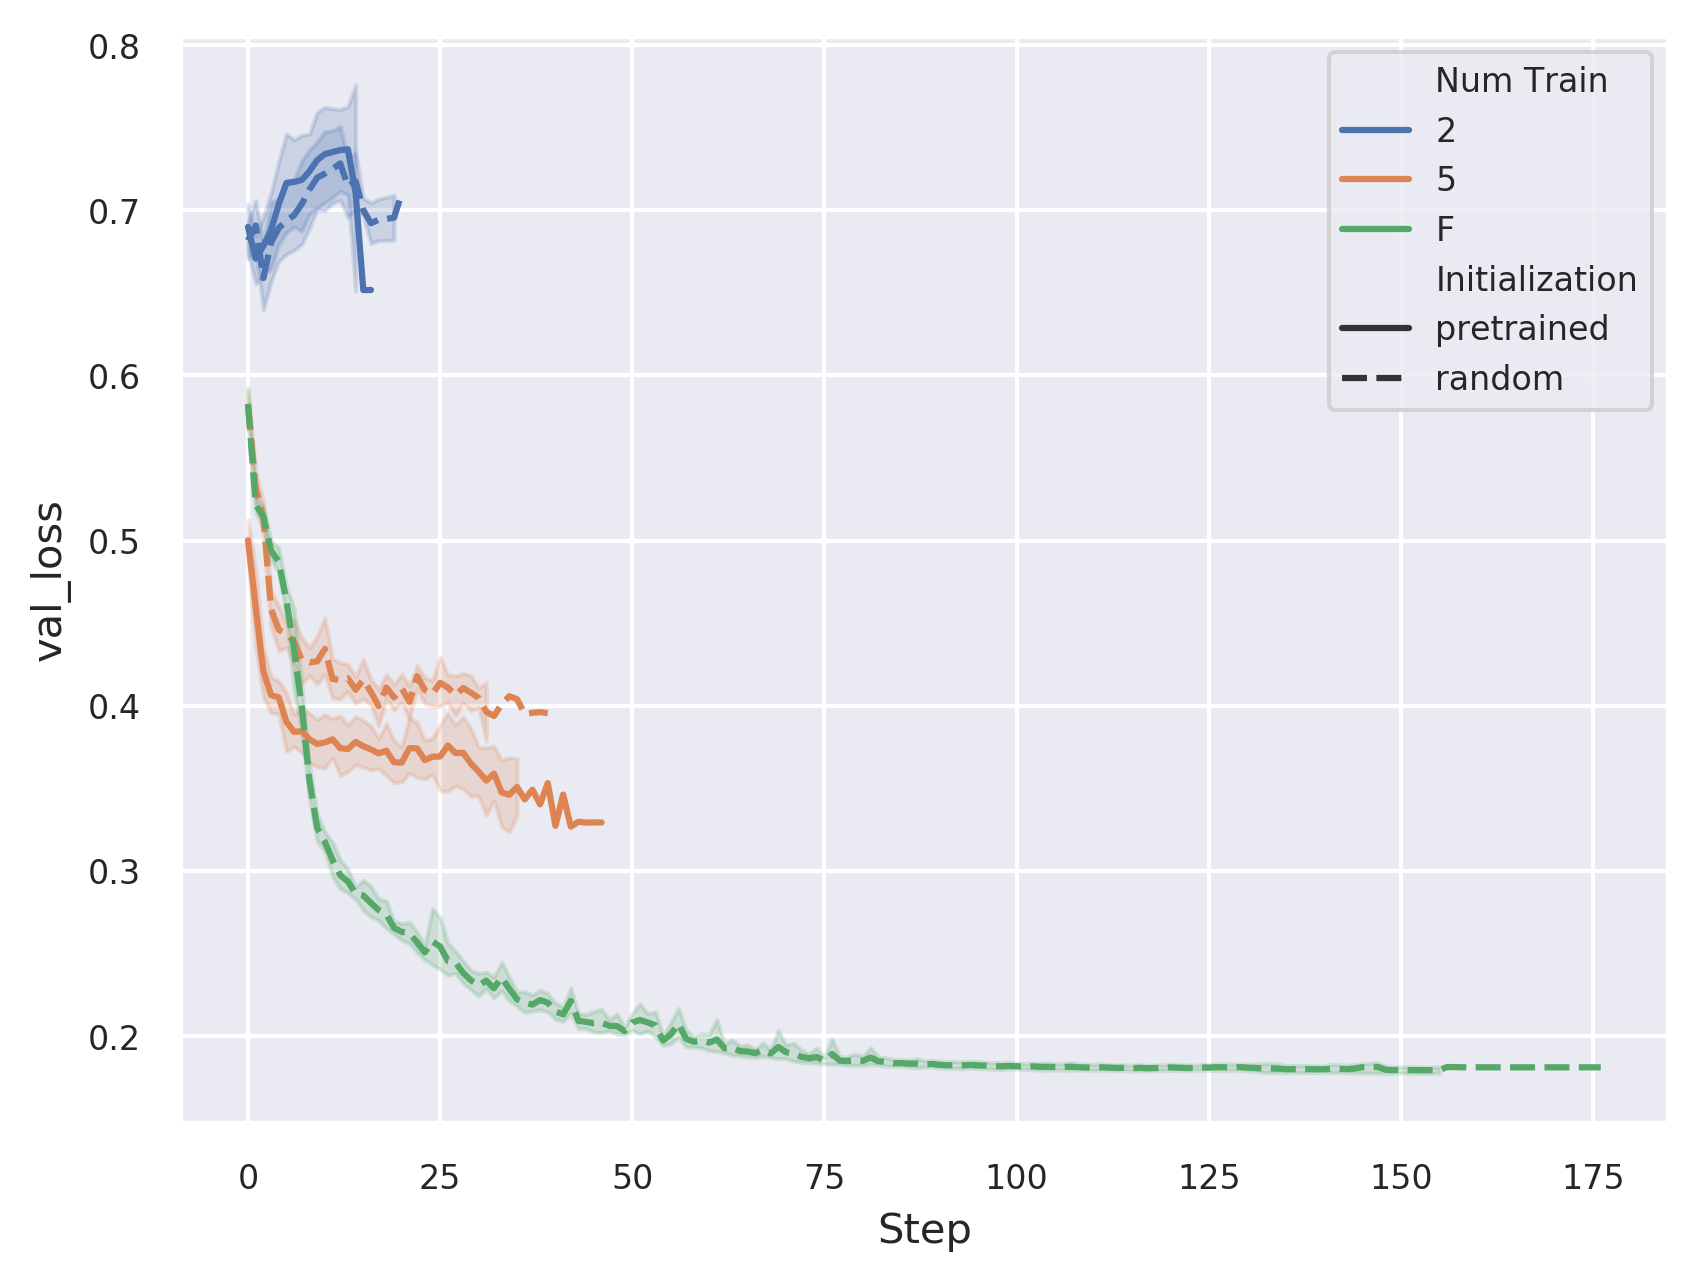

In [7]:
fig = visualize.plot_history('(P/hl60low|R/none)/dsb2018/stardist/unet/(002|005|F)/.*',
                             metric='val_loss',
                             hue='Num Train',
                             style='Initialization')